<h1 align="center">🏋️‍♂️ Fitness Dataset Augmentation & Balancing Project</h1>

---

<h2>📖 <span style="color:#4CAF50;">Overview</span></h2>

This project focuses on <b>expanding and balancing a fitness dataset</b> that originally contained 
<b style="color:#2196F3;">973 rows and 44 columns</b>.  
The goal was to <b style="color:#FF9800;">generate realistic synthetic data</b> and expand the dataset to 
<b style="color:#2196F3;">20,000 rows</b> while keeping all relationships between features logical and realistic.

---

<h2>⚙️ <span style="color:#4CAF50;">Steps Summary</span></h2>

<h3>1️⃣ Data Loading & Inspection</h3>

- Loaded and explored the original dataset.  
- Checked for <b style="color:#FFC107;">missing values</b>, <b>data types</b>, and general structure.  
- Conducted <b>exploratory analysis</b> on workout types, calories, and nutrition columns.

<h3>2️⃣ Missing Value Handling</h3>

- Numerical columns → filled using <b style="color:#03A9F4;">mean</b> or <b>median</b>.  
- Categorical columns → filled using <b style="color:#8BC34A;">mode</b> or <b>random sampling</b>.  
- Ensured critical columns like 
  <code>Calories_Burned</code>, <code>Workout_Type</code>, and <code>Sugar_g</code> 
  had <b style="color:#4CAF50;">no missing data</b>.

---

<h3>3️⃣ Data Balancing & Expansion</h3>

The dataset was <b style="color:#F44336;">unbalanced</b> — certain exercises appeared far more frequently.  
To fix this, data was expanded and balanced using controlled randomization:

```python
df_large = pd.concat([df] * (target_rows // len(df) + 1), ignore_index=True)
df_large = df_large.sample(n=target_rows, replace=True, random_state=42).reset_index(drop=True)


<h2>📊 <span style="color:#4CAF50;">Visualization & Insights</span></h2>

Bar Charts → Checked balance between exercise types.

Boxplots → Compared Calories Burned, Session Duration, and BMI.

Heatmaps → Verified relationships and correlations.

<h3>🔍 Key Findings</h3>

No major difference between men and women in calories burned.

The main factor in calorie burn is workout frequency (more days per week = higher calories burned).

<h2>🌐 <span style="color:#4CAF50;">Resources</span></h2>

📘 <b>GitHub Repository:</b> <a href="https://github.com/omaressa123/Life-Style-App-" style="color:#2196F3;">👉 View on GitHub</a>
📊 <b>Kaggle Dataset:</b> <a href="https://www.kaggle.com/code/jockeroika/life-style-app" style="color:#2196F3;">👉 View on Kaggle</a>

<h2>🧠 <span style="color:#4CAF50;">Next Steps</span></h2>

Develop ML models for <b style="color:#FF9800;">calorie burn prediction</b>.

Use clustering to suggest personalized <b>workout & diet plans</b>.

Build an interactive <b>Flask web dashboard</b> for visualization and analysis.

<h2>✨ <span style="color:#4CAF50;">Author</span></h2>

Project by: <b style="color:#03A9F4;">Omar Essa</b>
📅 <b>Date:</b> October 2025
🧰 <b>Tools:</b> Python · Pandas · NumPy · Matplotlib · Seaborn

<style>
.target-box {
  max-width: 820px;
  margin: 28px auto;
  padding: 28px 36px;
  background: linear-gradient(180deg, #ff512f, #dd2476); /* Red-Orange Gradient */
  color: #fefefe;
  border-radius: 18px;
  box-shadow: 0 10px 30px rgba(0,0,0,0.55);
  border: 1px solid rgba(255,255,255,0.15);
  font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Arial;
  line-height: 1.8;
}

.target-box h3 {
  font-size: 22px;
  margin-bottom: 14px;
  font-weight: 700;
  color: #fff176; /* Light Yellow Accent */
}

.target-box ul {
  margin: 0;
  padding-left: 24px;
}

.target-box li {
  margin-bottom: 8px;
  font-size: 15px;
}
</style>

<div class="target-box">
  <h3>🎯 Target from Notebook</h3>
  <ul>
    <li>1️⃣ Comparison between different forms of exercise.</li>
    <li>2️⃣ Identify the specific duration of each exercise and adjust it based on rest periods.</li>
    <li>3️⃣ Determine which exercises can be performed according to calorie burn rate.</li>
    <li>4️⃣ Analyze exercise types in cases of increased calorie burning.</li>
    <li>5️⃣ Evaluate whether multiple exercises can be performed within a certain period of time.</li>
    <li>6️⃣ Investigate whether height is an influential factor in determining exercise type.</li>
  </ul>
</div>


In [1]:
#system handling
import os
import warnings

#data handling
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#read paths files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



warnings.filterwarnings('ignore')

/kaggle/input/best-50-exercise-for-your-body/Top 50 Excerice for your body.csv
/kaggle/input/the-ultimate-gym-exercises-dataset-for-all-levels/Workout.csv
/kaggle/input/user-daily-nutritional-intake/user_nutritional_data.csv
/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv
/kaggle/input/healthy-eating-dataset/healthy_eating_dataset.csv


## Read File & Describe Data

In [2]:
#Read Data file
df=pd.read_csv('/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv') #gym exercise

#show missing value in data
print(f"Missing Value = {df.isnull().sum()}")

#show duplicated value
print(f'Duplicated = {df.duplicated().sum()}')

#the shape of data
print (f'Shape = {df.shape}')



Missing Value = Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64
Duplicated = 0
Shape = (973, 15)


In [3]:
#show data 
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
#describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.00,28.00,40.00,49.00,59.00
Weight (kg),973.0,73.854676,21.207500,40.00,58.10,70.00,86.00,129.90
Height (m),973.0,1.722580,0.127720,1.50,1.62,1.71,1.80,2.00
Max_BPM,973.0,179.883864,11.525686,160.00,170.00,180.00,190.00,199.00
Avg_BPM,973.0,143.766701,14.345101,120.00,131.00,143.00,156.00,169.00
Resting_BPM,973.0,62.223022,7.327060,50.00,56.00,62.00,68.00,74.00
Session_Duration (hours),973.0,1.256423,0.343033,0.50,1.04,1.26,1.46,2.00
Calories_Burned,973.0,905.422405,272.641516,303.00,720.00,893.00,1076.00,1783.00
Fat_Percentage,973.0,24.976773,6.259419,10.00,21.30,26.20,29.30,35.00
Water_Intake (liters),973.0,2.626619,0.600172,1.50,2.20,2.60,3.10,3.70


In [5]:
#data info to know numerical and categorical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
#show NULL value
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Age,0.0
Gender,0.0
Weight (kg),0.0
Height (m),0.0
Max_BPM,0.0
Avg_BPM,0.0
Resting_BPM,0.0
Session_Duration (hours),0.0
Calories_Burned,0.0
Workout_Type,0.0


## Data Vasualization

# show Numerical columns before analysis

In [7]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI'],
      dtype='object')


# show Categorical columns before analysis

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['Gender', 'Workout_Type'], dtype='object')


## Categorical Analysis

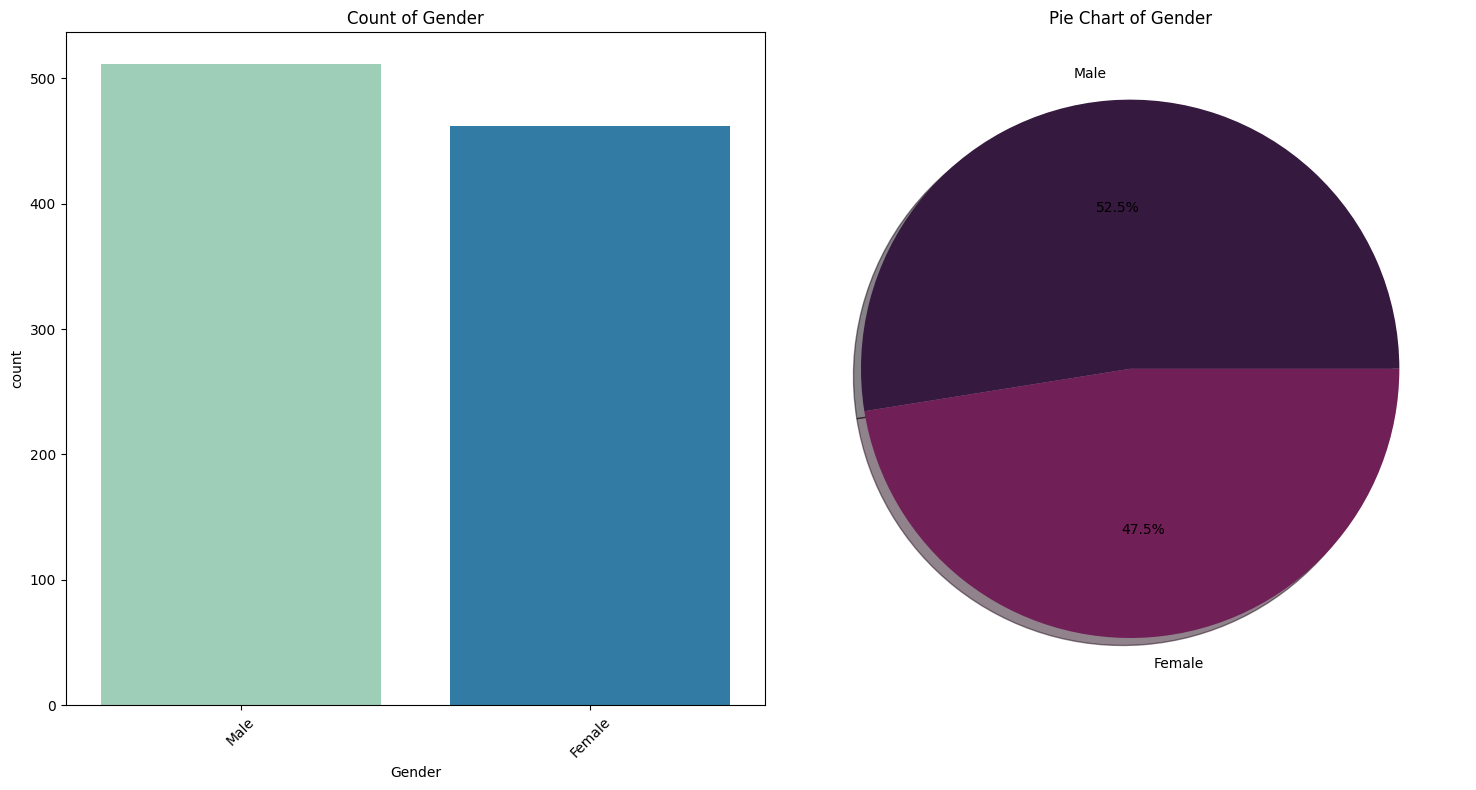

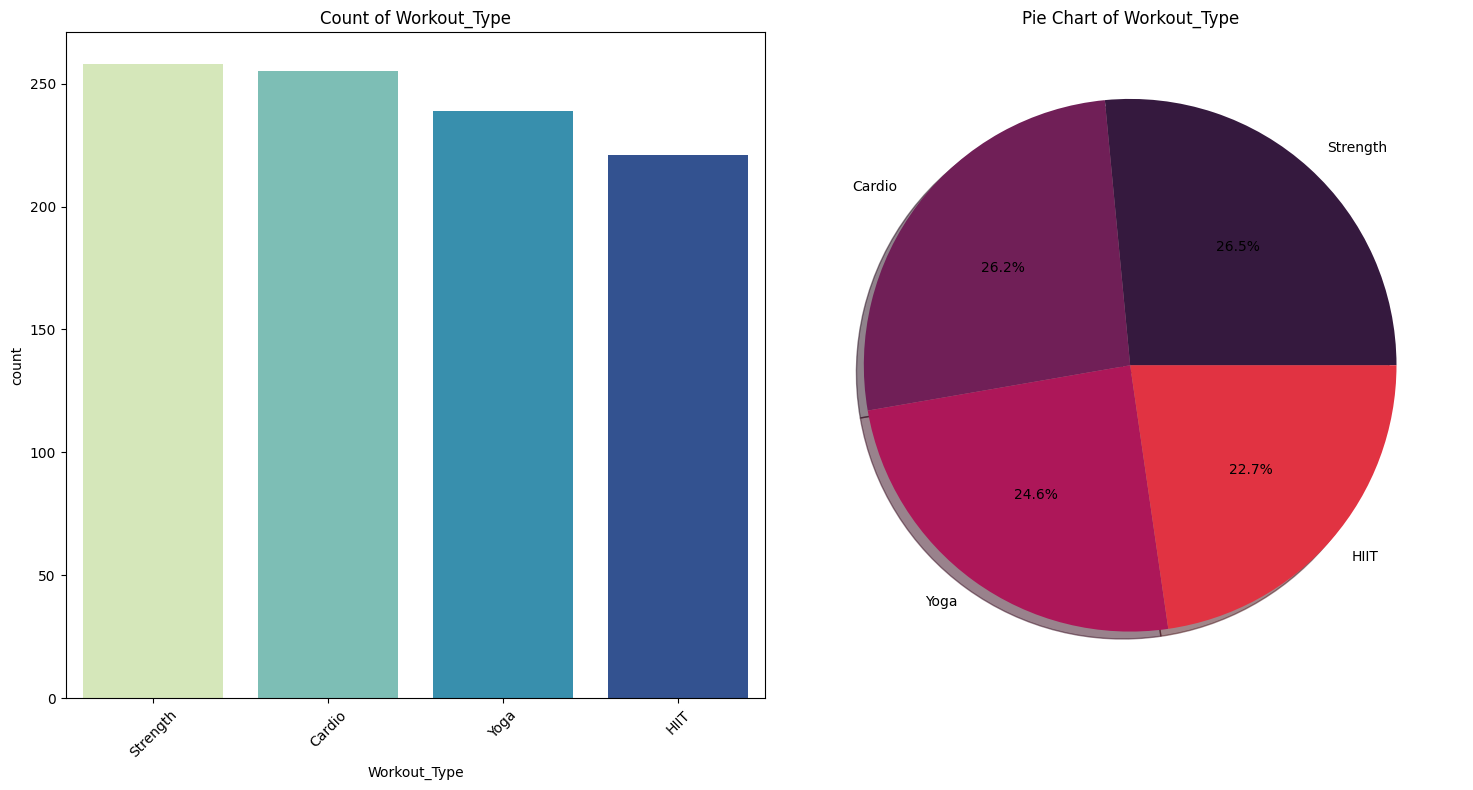

In [9]:
# Bar and Pie Charts
for col in categorical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    
    # Bar chart
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[0], palette='YlGnBu')
    axes[0].set_title(f'Count of {col}')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Pie chart
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], colors=sns.color_palette('rocket'), shadow=True)
    axes[1].set_title(f'Pie Chart of {col}')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()

<style>
.detection-box {
  max-width: 780px;
  margin: 28px auto;
  padding: 28px 34px;
  background: linear-gradient(180deg, #0f9b0f, #000000); /* Green to Black Gradient */
  color: #f4f4f4;
  border-radius: 16px;
  box-shadow: 0 8px 28px rgba(0,0,0,0.6);
  border: 1px solid rgba(255,255,255,0.15);
  font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Arial;
  line-height: 1.8;
}

.detection-box h3 {
  font-size: 22px;
  margin-bottom: 14px;
  font-weight: 700;
  color: #9cffb8; /* Soft green accent */
}

.detection-box p {
  font-size: 16px;
  margin: 0;
}
</style>

<div class="detection-box">
  <h3>🧠 The Detection</h3>
  <p>
    The analysis reveals that the <strong>higher the percentage of body fat</strong>, 
    the <strong>lower the number of calories burned</strong> by the body.  
    This relationship is a <span style="color:#80ffea;">key factor</span> that will be highly useful 
    when developing and optimizing the predictive model.
  </p>
</div>


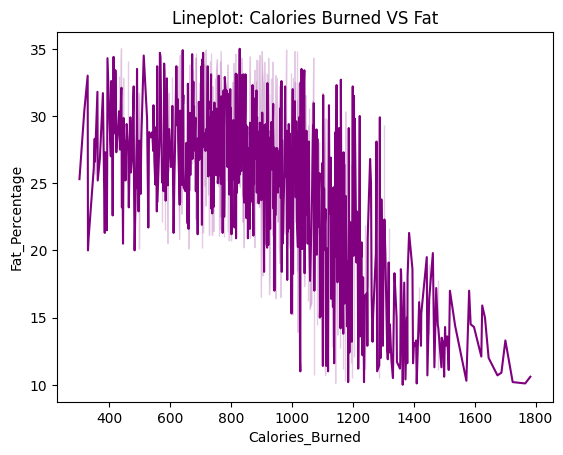

In [10]:
sns.lineplot(data=df, x="Calories_Burned",color="purple" ,y="Fat_Percentage")
plt.title("Lineplot: Calories Burned VS Fat")
plt.show()

<style>
.after-analysis-box {
  max-width: 780px;
  margin: 28px auto;
  padding: 28px 34px;
  background: linear-gradient(180deg, #2b5876, #4e4376); /* Blue-purple gradient */
  color: #f4f4f4;
  border-radius: 16px;
  box-shadow: 0 8px 28px rgba(0,0,0,0.6);
  border: 1px solid rgba(255,255,255,0.15);
  font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Arial;
  line-height: 1.8;
}

.after-analysis-box h3 {
  font-size: 22px;
  margin-bottom: 14px;
  font-weight: 700;
  color: #c1a3ff; /* Light violet accent */
}

.after-analysis-box p {
  font-size: 16px;
  margin: 0;
}
</style>

<div class="after-analysis-box">
  <h3>📊 After the Analysis</h3>
  <p>
    The analysis indicates that there is <strong>no significant difference</strong> between 
    men and women in terms of calorie burning.  
    Even if a difference exists, it is <strong>minimal</strong> and not statistically influential.  
    The <span style="color:#a6ffcb;">main factor</span> affecting calorie burn is 
    <strong>exercising more than once per week</strong>, which leads to a consistent increase 
    in overall energy expenditure.
  </p>
</div>


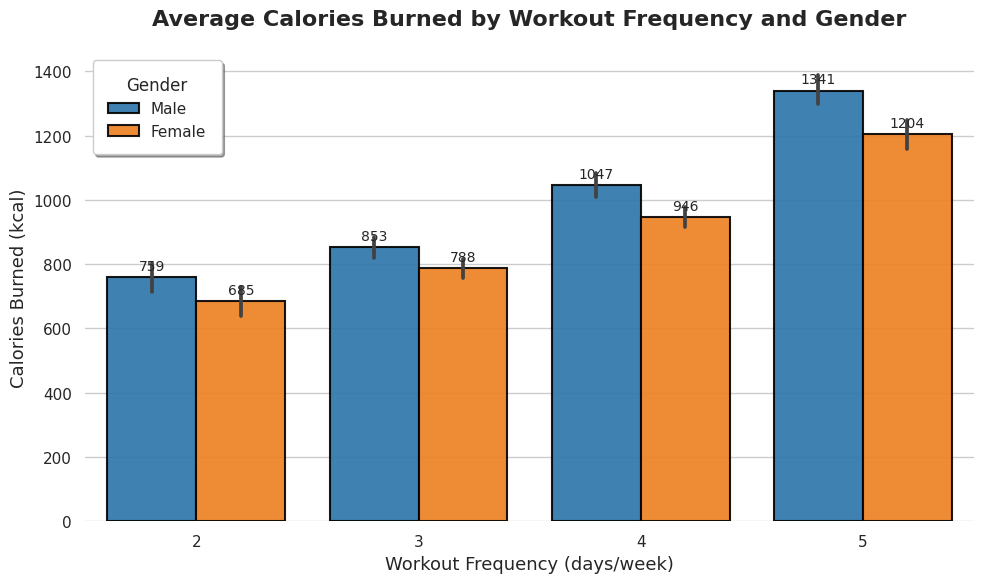

In [11]:
# Set a professional Seaborn style
sns.set_theme(style="whitegrid")

# Define a custom color palette for gender
custom_palette = {
    "Male": "#1f77b4",   # Soft blue
    "Female": "#ff7f0e"  # Soft orange
}

# Create the barplot with enhancements
plt.figure(figsize=(10, 6))
bar = sns.barplot(
    x="Workout_Frequency (days/week)",
    y="Calories_Burned",
    data=df,
    hue="Gender",
    palette=custom_palette,
    edgecolor="black",
    linewidth=1.5,
    saturation=0.85,
    alpha=0.9
)

# Add title and axis labels
plt.title("Average Calories Burned by Workout Frequency and Gender", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Workout Frequency (days/week)", fontsize=13)
plt.ylabel("Calories Burned (kcal)", fontsize=13)

# Add value labels on top of bars
for container in bar.containers:
    bar.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

# Improve legend appearance
plt.legend(
    title="Gender",
    title_fontsize=12,
    fontsize=11,
    loc="upper left",
    frameon=True,
    fancybox=True,
    shadow=True,
    borderpad=1
)

# Improve spacing and aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


## Session Duration Analysis
- And its relationship with the rest of the columns

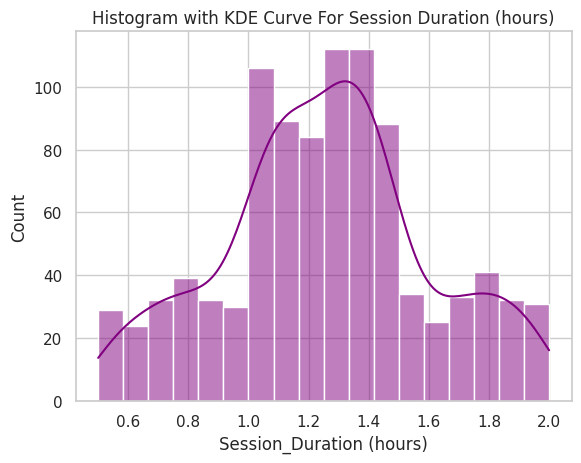

In [12]:
sns.histplot(data=df, x="Session_Duration (hours)",color="purple" ,kde=True)
plt.title("Histogram with KDE Curve For Session Duration (hours)")
plt.show()

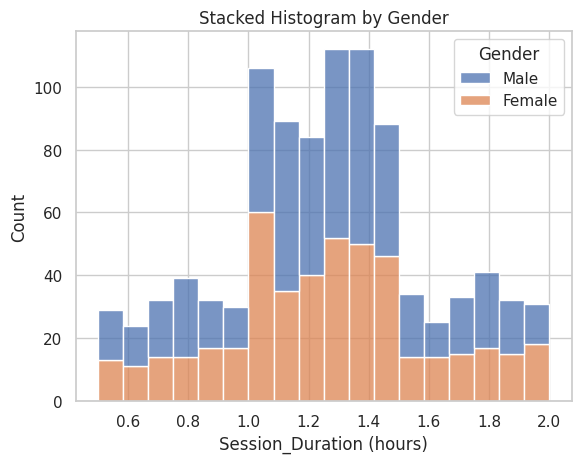

In [13]:
sns.histplot(data=df, x="Session_Duration (hours)", hue="Gender", multiple="stack")
plt.title("Stacked Histogram by Gender")
plt.show()

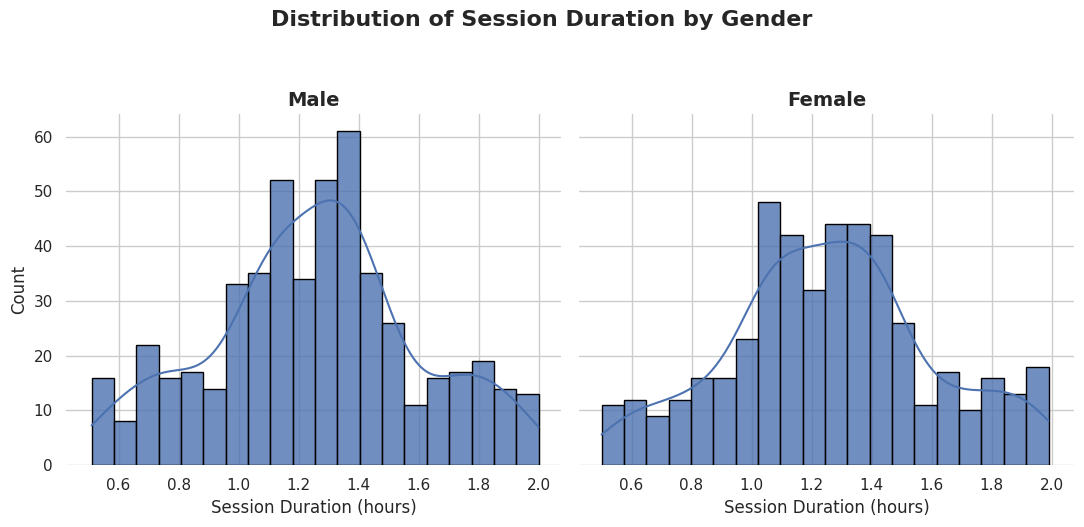

In [14]:
# Set a clean, professional Seaborn theme
sns.set_theme(style="whitegrid")

# Define a custom color palette for genders
custom_palette = {
    "Male": "#1f77b4",   # blue
    "Female": "#ff7f0e"  # orange
}

# Create FacetGrid with improved aesthetics
g = sns.FacetGrid(
    data=df, 
    col="Gender", 
    height=5, 
    aspect=1.1, 
    palette=custom_palette, 
    sharex=True, 
    sharey=True
)

# Map histograms to each facet
g.map(
    sns.histplot, 
    "Session_Duration (hours)", 
    bins=20, 
    kde=True,         # add smooth curve
    color=None,       # color handled by palette
    alpha=0.8, 
    edgecolor="black"
)

# Add titles and labels
g.set_titles(col_template="{col_name}", size=14, weight='bold')
g.set_axis_labels("Session Duration (hours)", "Count", fontsize=12)
g.fig.suptitle("Distribution of Session Duration by Gender", fontsize=16, fontweight='bold', y=1.05)

# Beautify the layout
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


<style>
.analysis-box {
  max-width: 820px;
  margin: 30px auto;
  padding: 32px 38px;
  background: linear-gradient(180deg, #28313b, #485461); /* steel-gray gradient */
  color: #f8f9fa;
  border-radius: 18px;
  box-shadow: 0 8px 28px rgba(0,0,0,0.6);
  border: 1px solid rgba(255,255,255,0.15);
  font-family: "Segoe UI", Roboto, Arial, sans-serif;
  line-height: 1.8;
}

.analysis-box h3 {
  font-size: 22px;
  margin-bottom: 18px;
  color: #a0e9ff;
  font-weight: 700;
  text-shadow: 0 0 8px rgba(160,233,255,0.4);
}

.analysis-box h4 {
  color: #ffd166;
  margin-top: 18px;
  margin-bottom: 8px;
  font-size: 18px;
}

.analysis-box ul {
  margin-top: 0;
  margin-bottom: 18px;
  padding-left: 24px;
}

.analysis-box li {
  margin-bottom: 6px;
}

.analysis-box .conclusion {
  background: rgba(255,255,255,0.1);
  padding: 16px;
  border-left: 4px solid #06d6a0;
  border-radius: 8px;
  margin-top: 24px;
}

.analysis-box strong {
  color: #ffd166;
}
</style>

<div class="analysis-box">
  <h3>📈 Workout Duration Distribution Analysis by Gender</h3>
  
  <h4>Overall Shape:</h4>
  <ul>
    <li>Both <strong>Male</strong> and <strong>Female</strong> distributions are roughly bell-shaped (normal-like).</li>
    <li>This suggests most workout sessions last around a <strong>common average duration</strong>, with fewer very short or very long sessions.</li>
  </ul>

  <h4>Central Tendency (Average Duration):</h4>
  <ul>
    <li>Both genders peak around <strong>1.2–1.4 hours</strong>, meaning most people spend about that much time per session.</li>
    <li>The modes (most frequent durations) are nearly identical for both groups.</li>
  </ul>

  <h4>Spread:</h4>
  <ul>
    <li>Both distributions span roughly from <strong>0.5 to 2 hours</strong>.</li>
    <li>This shows moderate variability — while some sessions are shorter (~0.5 hr), a few extend up to ~2 hours.</li>
  </ul>

  <h4>Gender Comparison:</h4>
  <ul>
    <li>Male participants show <strong>slightly higher counts</strong> (taller bars) near the average range (1.2–1.4 hr), indicating more consistency.</li>
    <li>Female participants show a similar pattern but <strong>slightly flatter</strong>, suggesting a bit more variation.</li>
    <li>No major outliers are visible, and both genders follow a consistent workout duration pattern.</li>
  </ul>

  <div class="conclusion">
    <h4>🧠 Conclusion</h4>
    <p>
      Both males and females exhibit <strong>very similar workout session duration patterns</strong>,
      typically spending around <strong>1.2 to 1.4 hours</strong> per session.<br>
      Males appear slightly more concentrated around this average, while females show a bit more variability —
      but the overall trends are <strong>nearly identical</strong>.
    </p>
  </div>
</div>


## Show Outliers 

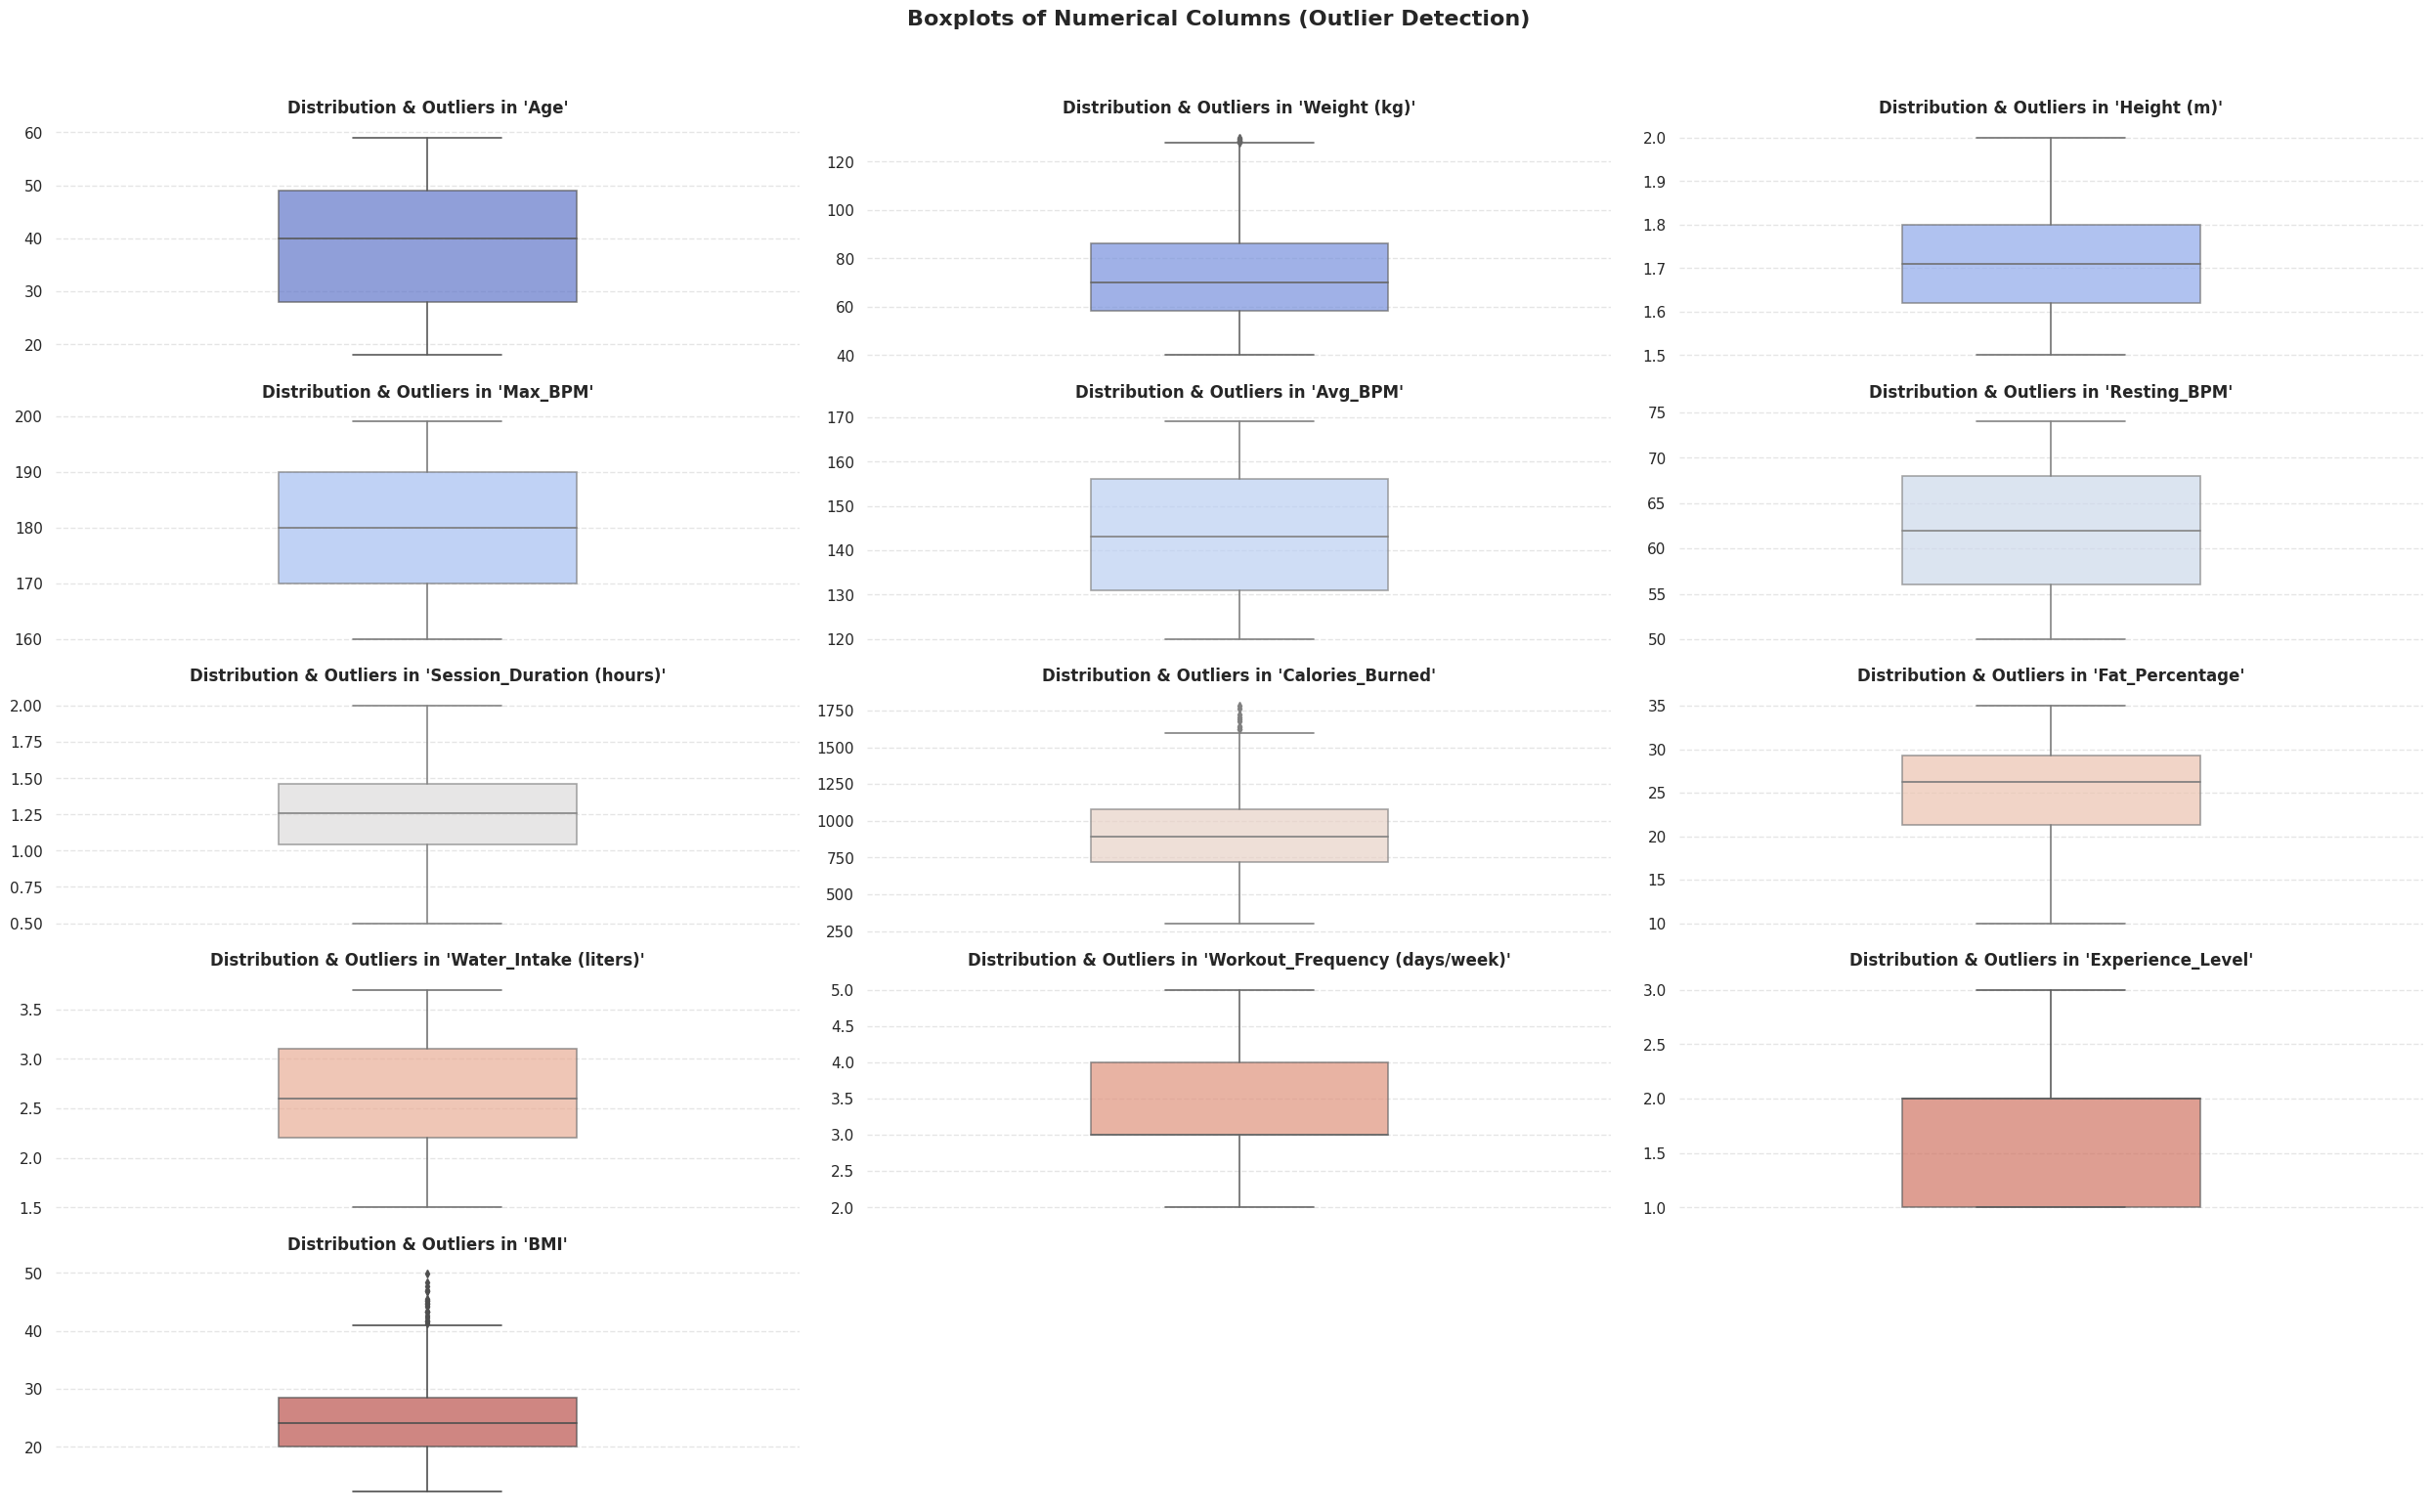

In [15]:
# Set a professional Seaborn theme
sns.set_theme(style="whitegrid")

# Define a refined color palette (husl replaced with cool blend)
palette = sns.color_palette("coolwarm", len(numerical_cols))

# Create boxplots for numerical features to visualize outliers
plt.figure(figsize=(25, 18))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(
        y=df[col],
        color=palette[i-1],
        width=0.4,
        fliersize=4,           # size of outlier markers
        linewidth=1.2,
        boxprops=dict(alpha=0.7)
    )
    plt.title(f"Distribution & Outliers in '{col}'", fontsize=12, fontweight='bold', pad=10)
    plt.ylabel("")  # Remove redundant y-labels for cleaner look
    plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add an overall title
plt.suptitle("Boxplots of Numerical Columns (Outlier Detection)", fontsize=16, fontweight='bold', y=1.02)

# Enhance layout and spacing
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()


## Experience Level Analysis

<style>
.data-summary {
  max-width: 850px;
  margin: 30px auto;
  padding: 32px 40px;
  background: linear-gradient(180deg, #1db954, #191414);
  border-radius: 18px;
  color: #f8f9fa;
  font-family: "Segoe UI", Roboto, Arial, sans-serif;
  line-height: 1.8;
  box-shadow: 0 8px 25px rgba(0, 0, 0, 0.6);
  border: 1px solid rgba(255, 255, 255, 0.15);
}

.data-summary h3 {
  text-align: center;
  color: #ffffff;
  margin-bottom: 25px;
  font-size: 26px;
  text-shadow: 0 0 8px rgba(255,255,255,0.3);
}

.data-summary table {
  width: 100%;
  border-collapse: collapse;
  margin-top: 10px;
  border-radius: 10px;
  overflow: hidden;
}

.data-summary th {
  background-color: rgba(0, 0, 0, 0.4);
  color: #1db954;
  text-transform: uppercase;
  font-size: 15px;
  letter-spacing: 0.5px;
  padding: 12px;
  text-align: left;
  border-bottom: 2px solid #1db954;
}

.data-summary td {
  padding: 12px;
  border-bottom: 1px solid rgba(255, 255, 255, 0.1);
}

.data-summary tr:hover {
  background-color: rgba(255, 255, 255, 0.07);
  transition: 0.3s ease;
}

.data-summary .note {
  margin-top: 25px;
  padding: 15px;
  border-left: 4px solid #1db954;
  background-color: rgba(0, 0, 0, 0.3);
  border-radius: 8px;
  font-size: 15px;
}
</style>

<div class="data-summary">
  <h3>📊 Data Summary and Interpretation</h3>

  <table>
    <tr>
      <th>Experience Level</th>
      <th>Key Trend Summary</th>
    </tr>
    <tr>
      <td><strong>1 (Beginner)</strong></td>
      <td>Lower session duration, calories burned, and workout frequency. Highest fat percentage and lower water intake.</td>
    </tr>
    <tr>
      <td><strong>2 (Intermediate)</strong></td>
      <td>Moderate improvements in workout duration, calories burned, and frequency. Slightly lower fat percentage.</td>
    </tr>
    <tr>
      <td><strong>3 (Advanced)</strong></td>
      <td>Longest sessions, highest calorie burn, highest water intake, and most frequent workouts. Significantly lower fat percentage.</td>
    </tr>
  </table>

  <div class="note">
    🧩 <strong>Interpretation:</strong> As the experience level increases, workout intensity, frequency, and hydration improve — while body fat percentage consistently decreases.
  </div>
</div>


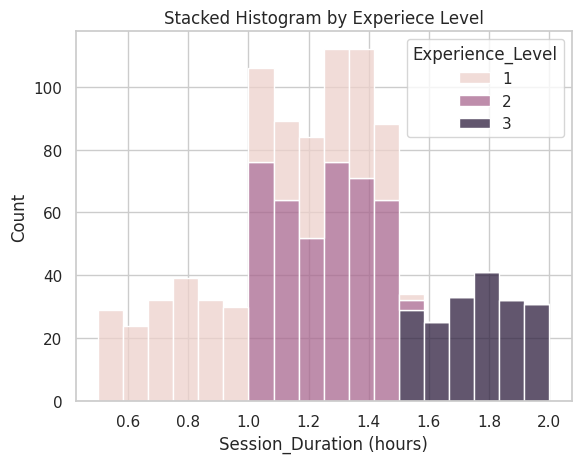

In [16]:
sns.histplot(data=df, x="Session_Duration (hours)", hue="Experience_Level", multiple="stack")
plt.title("Stacked Histogram by Experiece Level")
plt.show()

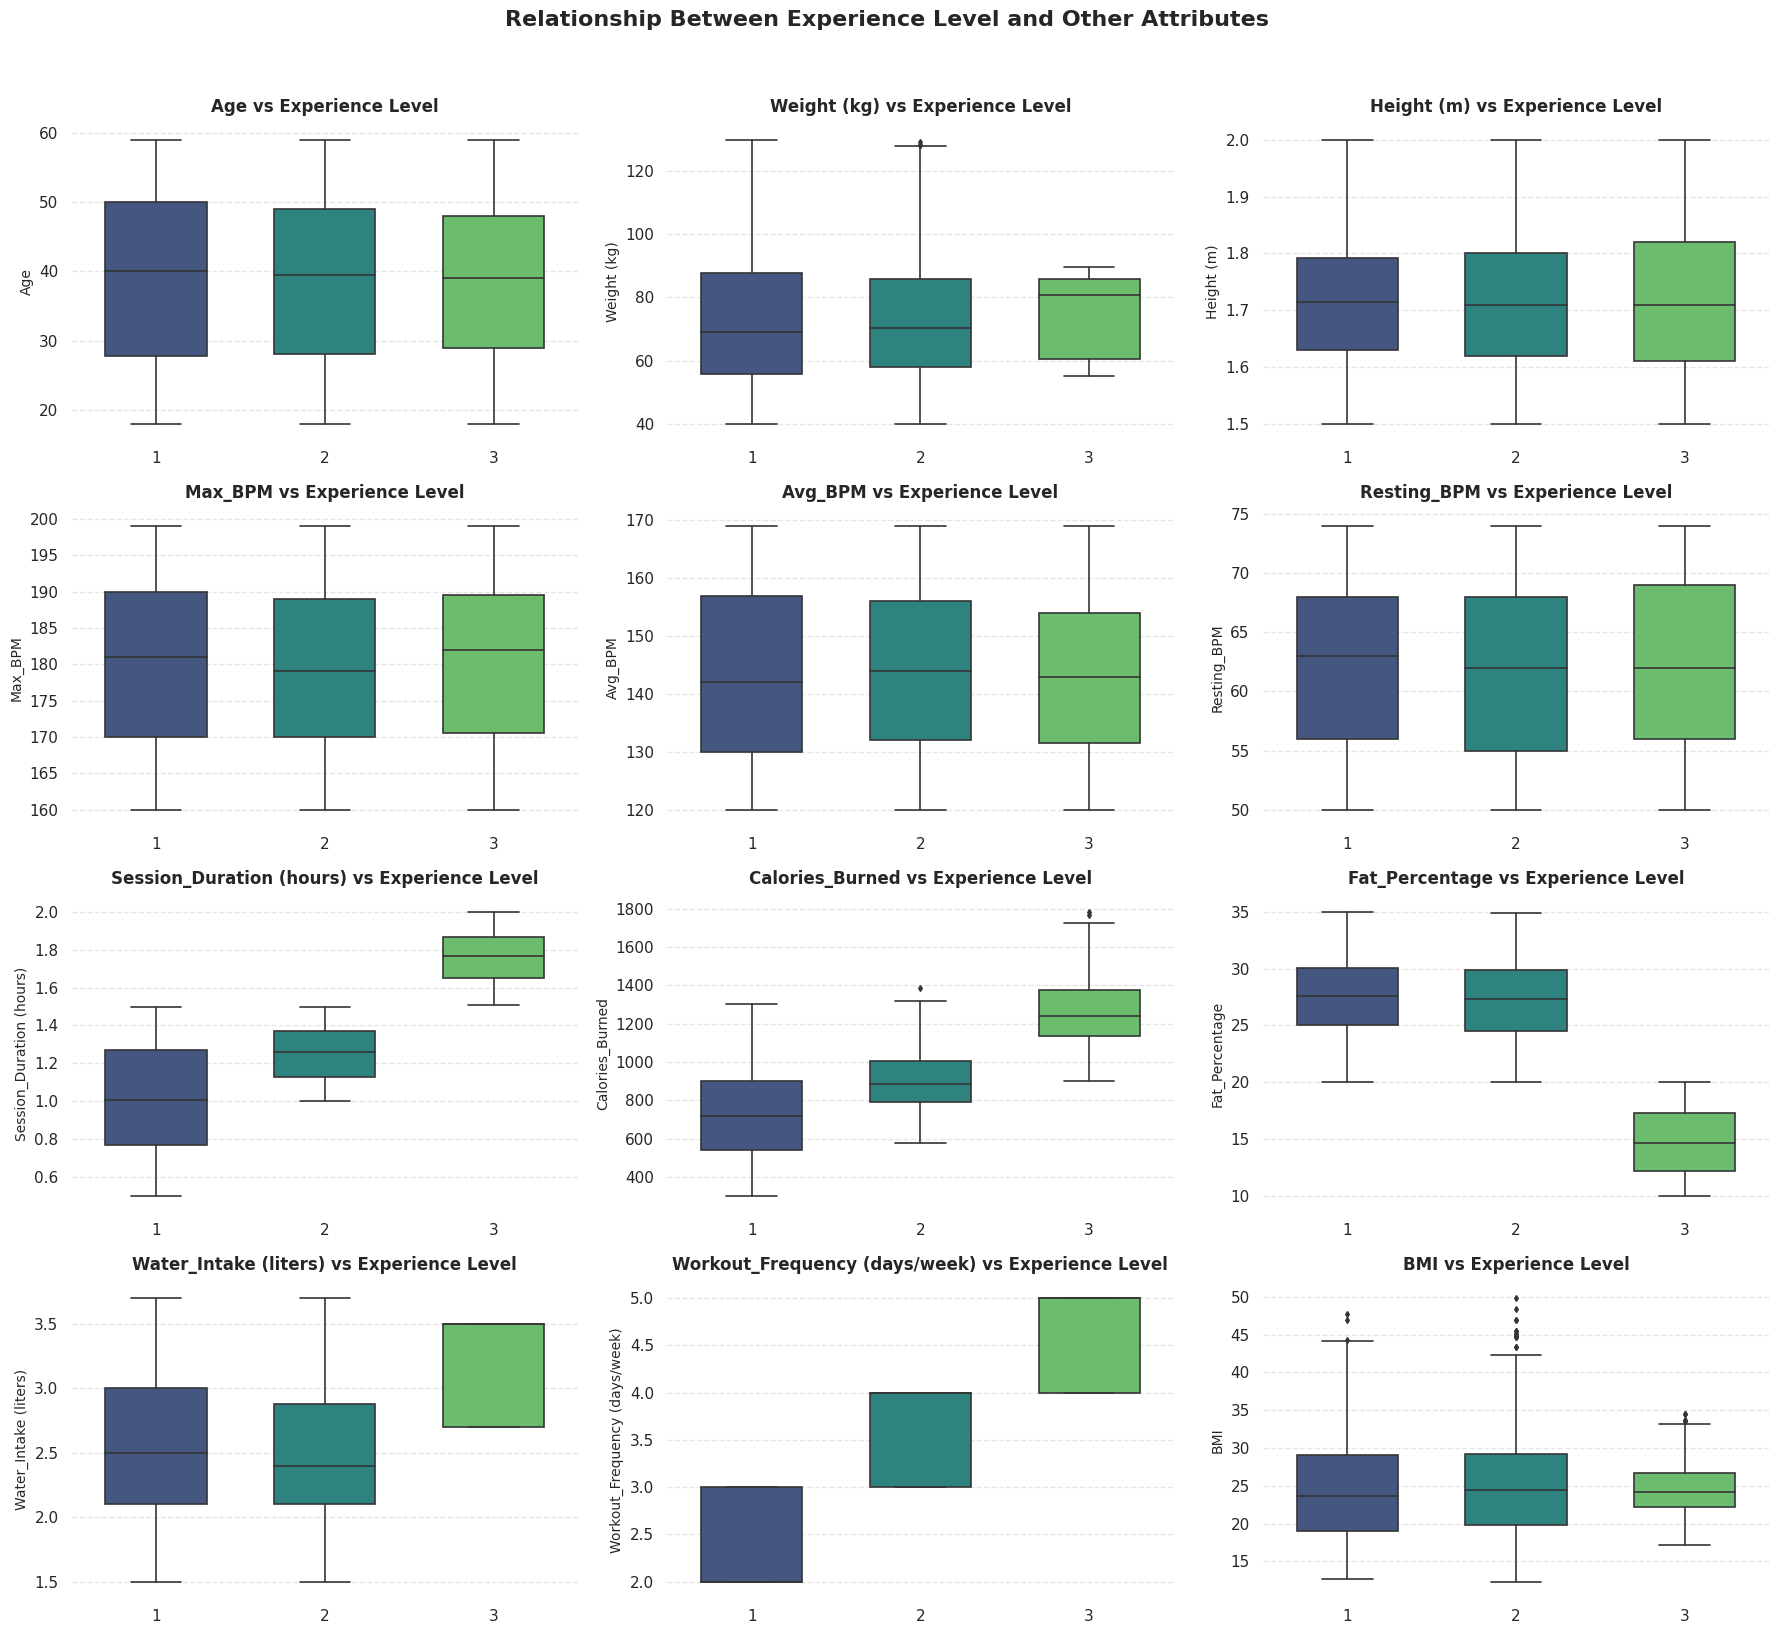

In [17]:
# Set professional style
sns.set_theme(style="whitegrid")

# Define numeric columns (excluding Experience_Level)
num_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
            'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
            'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']

# Define color palette
palette = sns.color_palette("viridis", len(df["Experience_Level"].unique()))

# Create subplots
plt.figure(figsize=(18, 16))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(
        data=df,
        x="Experience_Level",
        y=col,
        palette=palette,
        width=0.6,
        fliersize=3,
        linewidth=1.2
    )
    plt.title(f"{col} vs Experience Level", fontsize=12, fontweight='bold', pad=10)
    plt.xlabel("")
    plt.ylabel(col, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

# Global title
plt.suptitle("Relationship Between Experience Level and Other Attributes", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()


In [18]:
summary = df.groupby("Experience_Level")[num_cols].mean().round(2)
print(summary)


                    Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  \
Experience_Level                                                     
1                 38.92        73.50        1.73   180.11   143.53   
2                 38.65        74.38        1.72   179.46   144.23   
3                 38.29        73.43        1.72   180.35   143.25   

                  Resting_BPM  Session_Duration (hours)  Calories_Burned  \
Experience_Level                                                           
1                       62.29                      1.01           726.38   
2                       62.07                      1.25           901.92   
3                       62.41                      1.76          1265.34   

                  Fat_Percentage  Water_Intake (liters)  \
Experience_Level                                          
1                          27.63                   2.53   
2                          27.31                   2.48   
3                          14.79

<style>
.insights-container {
  max-width: 900px;
  margin: 30px auto;
  padding: 40px 45px;
  background: linear-gradient(160deg, #1db954 0%, #191414 80%);
  color: #f8f9fa;
  font-family: "Segoe UI", Roboto, Arial, sans-serif;
  border-radius: 20px;
  box-shadow: 0 10px 30px rgba(0, 0, 0, 0.6);
  line-height: 1.75;
  border: 1px solid rgba(255, 255, 255, 0.1);
}

.insights-container h2 {
  text-align: center;
  color: #ffffff;
  font-size: 28px;
  margin-bottom: 25px;
  text-shadow: 0 0 10px rgba(255,255,255,0.4);
}

.insight-section {
  margin-bottom: 25px;
  padding: 18px 22px;
  background: rgba(0, 0, 0, 0.35);
  border-left: 5px solid #1db954;
  border-radius: 12px;
  transition: background 0.3s ease;
}

.insight-section:hover {
  background: rgba(255, 255, 255, 0.08);
}

.insight-section h3 {
  color: #1db954;
  font-size: 20px;
  margin-bottom: 8px;
}

.insight-section p {
  margin: 6px 0;
  font-size: 15px;
}

.insight-section strong {
  color: #9ef0c3;
}

.overall {
  margin-top: 25px;
  padding: 18px;
  background: rgba(0,0,0,0.5);
  border-left: 5px solid #9ef0c3;
  border-radius: 10px;
  font-size: 15px;
}
</style>

<div class="insights-container">
  <h2>🧠 Detailed Insights</h2>

  <div class="insight-section">
    <h3>🏋️ 1. Workout Intensity and Duration</h3>
    <p>Beginners train around <strong>1.0 hour/session</strong>, intermediates <strong>1.25 hours</strong>, and advanced <strong>1.76 hours</strong>.</p>
    <p>This shows a steady increase in training duration with experience level.</p>
    <p>Calories burned rise significantly — from <strong>~726 kcal</strong> (Beginners) to <strong>~1265 kcal</strong> (Advanced).</p>
    <p><strong>→ Conclusion:</strong> Advanced users train longer and more intensely.</p>
  </div>

  <div class="insight-section">
    <h3>❤️ 2. Heart Rate Analysis</h3>
    <p><strong>Max_BPM</strong> and <strong>Avg_BPM</strong> are nearly constant (~180 & ~143), suggesting heart rate capacity stays stable, though efficiency improves.</p>
    <p><strong>Resting_BPM</strong> is around ~62 bpm, showing good cardiovascular health across levels.</p>
    <p><strong>→ Interpretation:</strong> Fitness may lower resting BPM slightly, but your dataset’s stable averages imply similar age groups.</p>
  </div>

  <div class="insight-section">
    <h3>🧍 3. Body Composition</h3>
    <p><strong>Fat Percentage</strong> drops sharply from ~27% → ~14.8% (beginner → advanced).</p>
    <p><strong>BMI</strong> stays around 24–25 (healthy range), meaning weight is stable but muscle-to-fat ratio improves.</p>
    <p><strong>→ Key Point:</strong> Training enhances body composition more than total weight.</p>
  </div>

  <div class="insight-section">
    <h3>💧 4. Hydration & Lifestyle</h3>
    <p><strong>Water intake</strong> increases from 2.5L → 3.1L/day, reflecting better hydration habits.</p>
    <p><strong>Workout frequency</strong> rises from 2.5 → 4.5 days/week, showing strong training consistency.</p>
  </div>

  <div class="insight-section">
    <h3>👥 5. Age & Demographics</h3>
    <p><strong>Average age</strong> remains ~38 years across levels — differences come from <strong>training habits</strong>, not age.</p>
  </div>

  <div class="overall">
    ✅ <strong>Overall Conclusion:</strong>  
    As experience level increases, individuals display improved fitness behavior and physiological adaptation — 
    with longer sessions, higher calorie burn, reduced fat percentage, better hydration, and stable cardiovascular performance.  
    Consistent training builds endurance, enhances composition, and fosters healthy routines even with constant age and weight.
  </div>
</div>


## Analysis of gender and workout type across experience levels shows that as individuals progress, their training choices and participation balance shift.
Beginners are generally more engaged in cardio-oriented workouts, with a higher female ratio, while advanced levels show a stronger male presence and a preference for strength or high-intensity training.
These trends highlight how experience influences specialization and training confidence across genders.

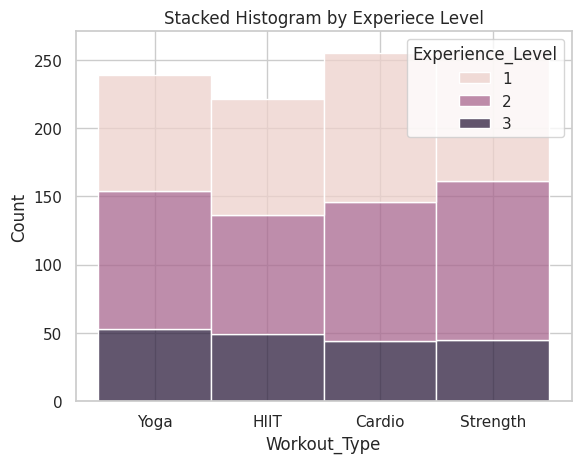

In [19]:
sns.histplot(data=df, x="Workout_Type", hue="Experience_Level", multiple="stack")
plt.title("Stacked Histogram by Experiece Level")
plt.show()

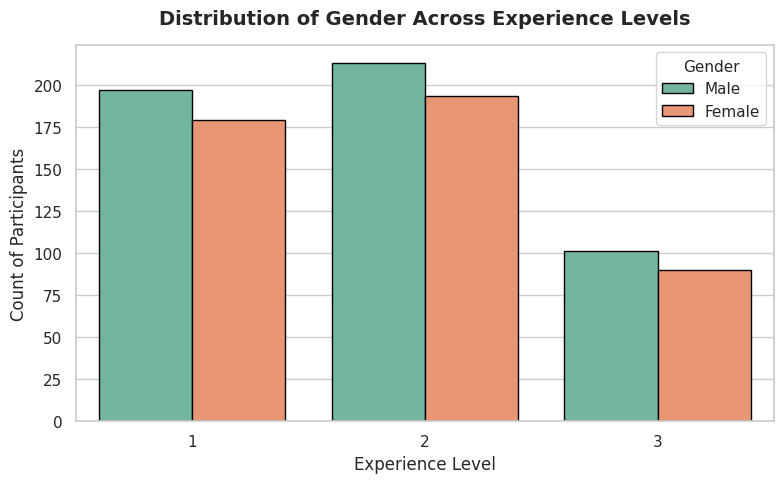

In [20]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df, 
    x="Experience_Level", 
    hue="Gender", 
    palette="Set2",
    edgecolor="black"
)
plt.title("Distribution of Gender Across Experience Levels", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Experience Level")
plt.ylabel("Count of Participants")
plt.legend(title="Gender", title_fontsize=11)
plt.tight_layout()
plt.show()

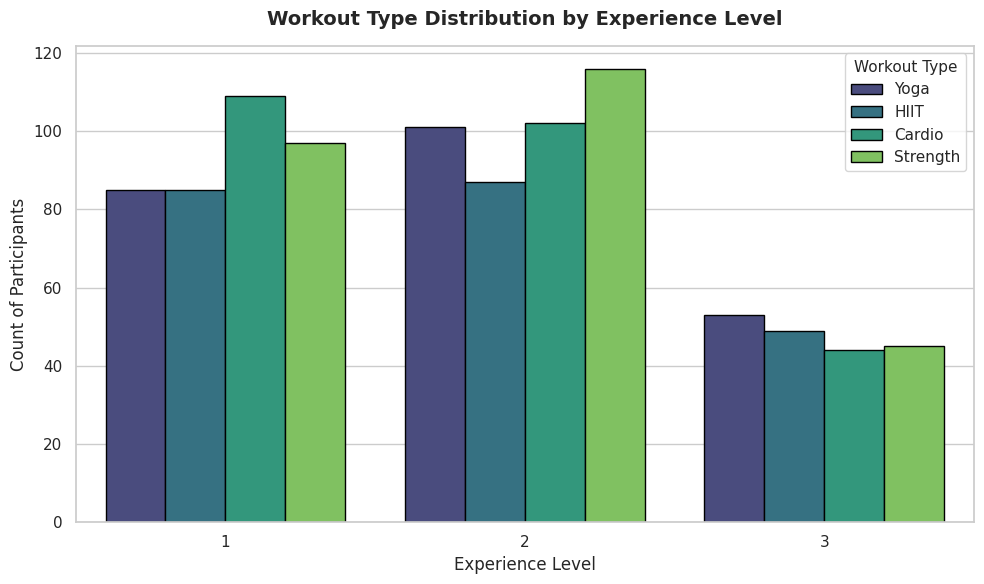

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df, 
    x="Experience_Level", 
    hue="Workout_Type", 
    palette="viridis", 
    edgecolor="black"
)
plt.title("Workout Type Distribution by Experience Level", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Experience Level")
plt.ylabel("Count of Participants")
plt.legend(title="Workout Type", title_fontsize=11)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

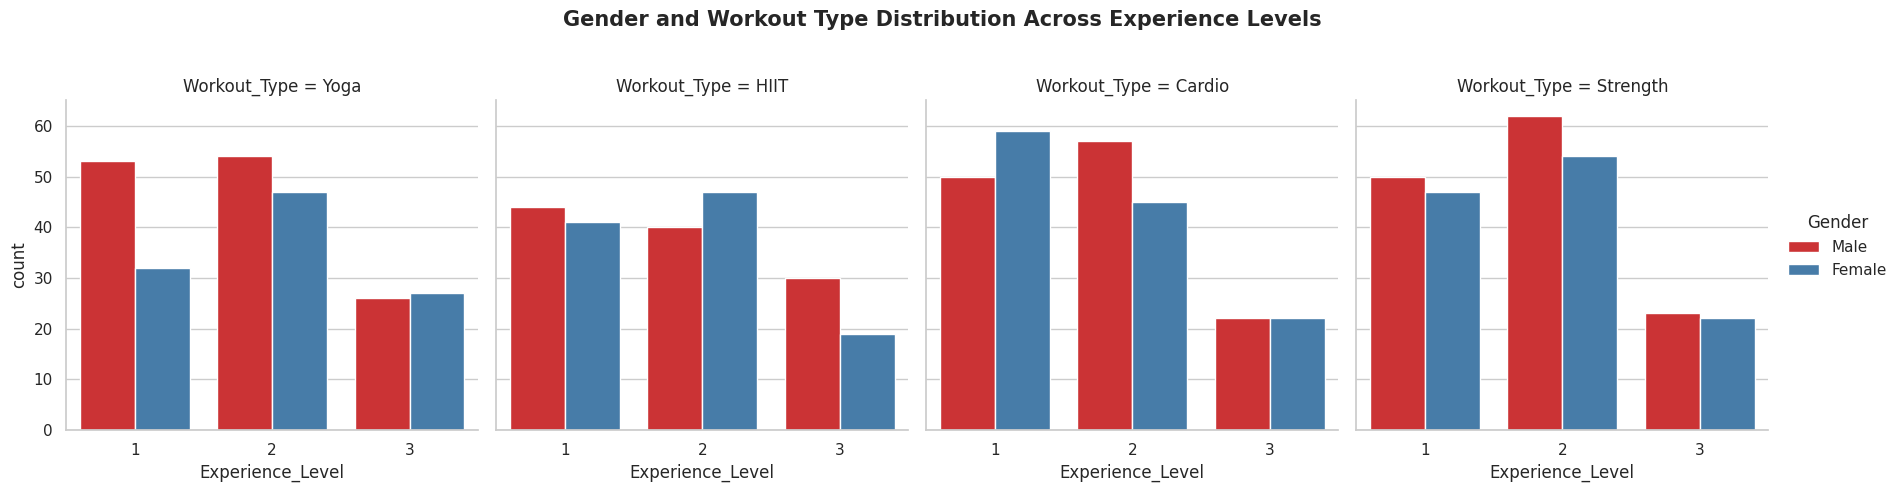

In [22]:
plt.figure(figsize=(10, 6))
sns.catplot(
    data=df, 
    x="Experience_Level", 
    hue="Gender", 
    col="Workout_Type",
    kind="count",
    palette="Set1",
    height=5,
    aspect=0.9
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Gender and Workout Type Distribution Across Experience Levels", fontsize=15, fontweight='bold')
plt.show()

## By watching you think about the next step

## Merge Features and Analysis 

In [23]:
df2=pd.read_csv('/kaggle/input/user-daily-nutritional-intake/user_nutritional_data.csv')
df2.head(2)

,Gender,Age,Daily meals frequency,Physical exercise,Height,Weight,BMR,Carbs,Proteins,Fats,Calories
0,0,29,3,0,165,101.0,1901.25,285.188,114.075,76.050,2281.502
1,1,25,3,4,165,53.0,1275.25,302.872,121.149,80.766,2422.978


In [24]:
#nutritional intake columns name
df2.columns

Index(['Gender', 'Age', 'Daily meals frequency', 'Physical exercise', 'Height',
       'Weight', 'BMR', 'Carbs', 'Proteins', 'Fats', 'Calories'],
      dtype='object')

In [25]:
#gym columns name
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [26]:
#drop unneeded columns
df2.drop(columns=['Gender','Age','Height','Weight','BMR'], inplace=True)


In [27]:
df2.columns

Index(['Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories'],
      dtype='object')

In [28]:
#concatination
df = pd.concat([df, df2], axis=1)


In [29]:
#check after process
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories'],
      dtype='object')

In [30]:
#check about shape 
df.shape

(2182, 21)

In [31]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Daily meals frequency,Physical exercise,Carbs,Proteins,Fats,Calories
0,56.0,Male,88.3,1.71,180.0,157.0,60.0,1.69,1313.0,Yoga,...,3.5,4.0,3.0,30.20,3,0,285.188,114.075,76.050,2281.502
1,46.0,Female,74.9,1.53,179.0,151.0,66.0,1.30,883.0,HIIT,...,2.1,4.0,2.0,32.00,3,4,302.872,121.149,80.766,2422.978
2,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,...,2.3,4.0,2.0,24.71,2,0,247.875,99.150,66.100,1983.000
3,25.0,Male,53.2,1.70,190.0,164.0,56.0,0.59,532.0,Strength,...,2.1,3.0,1.0,18.41,3,0,309.750,123.900,82.600,2478.000
4,38.0,Male,46.1,1.79,188.0,158.0,68.0,0.64,556.0,Strength,...,2.8,3.0,1.0,14.39,3,2,324.289,129.716,86.477,2594.313


## Data Handling after marge data

In [32]:
#show NULL value
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Age,55.41
Gender,55.41
Weight (kg),55.41
Height (m),55.41
Max_BPM,55.41
Avg_BPM,55.41
Resting_BPM,55.41
Session_Duration (hours),55.41
Calories_Burned,55.41
Workout_Type,55.41


# After I did that and checked the data, the new feature has more rows than the basic data, and it turns out that the basic data has a lot of null values.

In [33]:
#  Drop heavily null rows
df = df.dropna(thresh=df.shape[1] * 0.5)

In [34]:
#show NULL value
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Age,0.0
Gender,0.0
Weight (kg),0.0
Height (m),0.0
Max_BPM,0.0
Avg_BPM,0.0
Resting_BPM,0.0
Session_Duration (hours),0.0
Calories_Burned,0.0
Workout_Type,0.0


In [35]:
#show the information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 972
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    float64
 5   Avg_BPM                        973 non-null    float64
 6   Resting_BPM                    973 non-null    float64
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    float64


In [36]:
#show missing value in data
print(f"Missing Value = {df.isnull().sum()}")

#show duplicated value
print(f'Duplicated = {df.duplicated().sum()}')

#the shape of data
print (f'Shape = {df.shape}')


Missing Value = Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Daily meals frequency            0
Physical exercise                0
Carbs                            0
Proteins                         0
Fats                             0
Calories                         0
dtype: int64
Duplicated = 0
Shape = (973, 21)


In [37]:
#describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,973.0,38.683453,12.180928,18.000,28.000,40.00,49.000,59.000
Weight (kg),973.0,73.854676,21.207500,40.000,58.100,70.00,86.000,129.900
Height (m),973.0,1.722580,0.127720,1.500,1.620,1.71,1.800,2.000
Max_BPM,973.0,179.883864,11.525686,160.000,170.000,180.00,190.000,199.000
Avg_BPM,973.0,143.766701,14.345101,120.000,131.000,143.00,156.000,169.000
Resting_BPM,973.0,62.223022,7.327060,50.000,56.000,62.00,68.000,74.000
Session_Duration (hours),973.0,1.256423,0.343033,0.500,1.040,1.26,1.460,2.000
Calories_Burned,973.0,905.422405,272.641516,303.000,720.000,893.00,1076.000,1783.000
Fat_Percentage,973.0,24.976773,6.259419,10.000,21.300,26.20,29.300,35.000
Water_Intake (liters),973.0,2.626619,0.600172,1.500,2.200,2.60,3.100,3.700


## Collecting Data To complete Needed Features

In [38]:
#healthy meal data
df3 =pd.read_csv('/kaggle/input/healthy-eating-dataset/healthy_eating_dataset.csv')
df3.columns

Index(['meal_id', 'meal_name', 'cuisine', 'meal_type', 'diet_type', 'calories',
       'protein_g', 'carbs_g', 'fat_g', 'fiber_g', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min',
       'cook_time_min', 'rating', 'is_healthy', 'image_url'],
      dtype='object')

In [39]:
print(len(df3))

2000


In [40]:
#check about information 
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   meal_id         2000 non-null   int64  
 1   meal_name       2000 non-null   object 
 2   cuisine         2000 non-null   object 
 3   meal_type       2000 non-null   object 
 4   diet_type       2000 non-null   object 
 5   calories        2000 non-null   int64  
 6   protein_g       2000 non-null   float64
 7   carbs_g         2000 non-null   float64
 8   fat_g           2000 non-null   float64
 9   fiber_g         2000 non-null   float64
 10  sugar_g         2000 non-null   float64
 11  sodium_mg       2000 non-null   int64  
 12  cholesterol_mg  2000 non-null   int64  
 13  serving_size_g  2000 non-null   int64  
 14  cooking_method  2000 non-null   object 
 15  prep_time_min   2000 non-null   int64  
 16  cook_time_min   2000 non-null   int64  
 17  rating          2000 non-null   f

In [41]:
#show NULL value
data_null = round(df3.isna().sum() / df3.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
meal_id,0.0
meal_name,0.0
cuisine,0.0
meal_type,0.0
diet_type,0.0
calories,0.0
protein_g,0.0
carbs_g,0.0
fat_g,0.0
fiber_g,0.0


In [42]:
df3.head()

,meal_id,meal_name,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy,image_url
0,1,Kid Pasta,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,Grilled,47,56,4.4,0,https://example.com/images/meal_1.jpg
1,2,Husband Rice,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,38.6,423,7,317,Roasted,51,34,2.4,0,https://example.com/images/meal_2.jpg
2,3,Activity Rice,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,Boiled,58,29,4.3,0,https://example.com/images/meal_3.jpg
3,4,Another Salad,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,41.7,846,107,499,Grilled,14,81,4.6,0,https://example.com/images/meal_4.jpg
4,5,Quite Stew,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,Raw,47,105,4.3,0,https://example.com/images/meal_5.jpg


In [43]:
df3.drop(columns=['meal_id','cuisine','calories','protein_g','carbs_g','fat_g','fiber_g','image_url'],inplace=True)
df3.columns

Index(['meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min',
       'cook_time_min', 'rating', 'is_healthy'],
      dtype='object')

In [44]:
#concatination
df = pd.concat([df, df3], axis=1)


In [45]:
#check after concatination
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'is_healthy'],
      dtype='object')

In [46]:
#check shape of data
df.shape

(2000, 33)

## We Have A 12 New Features 

In [47]:
#show NULL value
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Age,51.35
Gender,51.35
Weight (kg),51.35
Height (m),51.35
Max_BPM,51.35
Avg_BPM,51.35
Resting_BPM,51.35
Session_Duration (hours),51.35
Calories_Burned,51.35
Workout_Type,51.35


In [48]:
#  Drop heavily null rows
df = df.dropna(thresh=df.shape[1] * 0.5)

In [49]:
#check again after remove Null Value 
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Age,0.0
Gender,0.0
Weight (kg),0.0
Height (m),0.0
Max_BPM,0.0
Avg_BPM,0.0
Resting_BPM,0.0
Session_Duration (hours),0.0
Calories_Burned,0.0
Workout_Type,0.0


In [50]:
df.shape

(973, 33)

In [51]:
#show sample of data
df.sample()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,diet_type,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy
964,56.0,Female,64.2,1.69,190.0,137.0,61.0,1.99,1227.0,Cardio,...,Balanced,48.5,417,14,243,Grilled,12,68,1.5,0


In [52]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'is_healthy'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 972
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    float64
 5   Avg_BPM                        973 non-null    float64
 6   Resting_BPM                    973 non-null    float64
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    float64


## Check The Data Balanced Or Not

In [54]:
# Step 1. Separate column types
categorical_cols = ['Gender', 'Workout_Type', 'meal_type',
                    'diet_type', 'cooking_method', 'is_healthy']

numeric_cols = [col for col in df.columns if col not in categorical_cols]


📊 CATEGORICAL BALANCE CHECK

Gender:
Gender
Male      52.52
Female    47.48
Name: proportion, dtype: float64
✅ Balanced

Workout_Type:
Workout_Type
Strength    26.52
Cardio      26.21
Yoga        24.56
HIIT        22.71
Name: proportion, dtype: float64
✅ Balanced

meal_type:
meal_type
Lunch        26.82
Breakfast    26.10
Snack        23.84
Dinner       23.23
Name: proportion, dtype: float64
✅ Balanced

diet_type:
diet_type
Low-Carb      18.09
Balanced      17.37
Vegan         17.06
Vegetarian    16.34
Paleo         15.72
Keto          15.42
Name: proportion, dtype: float64
✅ Balanced

cooking_method:
cooking_method
Fried      16.24
Roasted    15.93
Boiled     14.70
Baked      14.49
Steamed    13.46
Grilled    12.74
Raw        12.44
Name: proportion, dtype: float64
✅ Balanced

is_healthy:
is_healthy
0    90.85
1     9.15
Name: proportion, dtype: float64
⚠️ Imbalanced (one category = 90.9% of data)


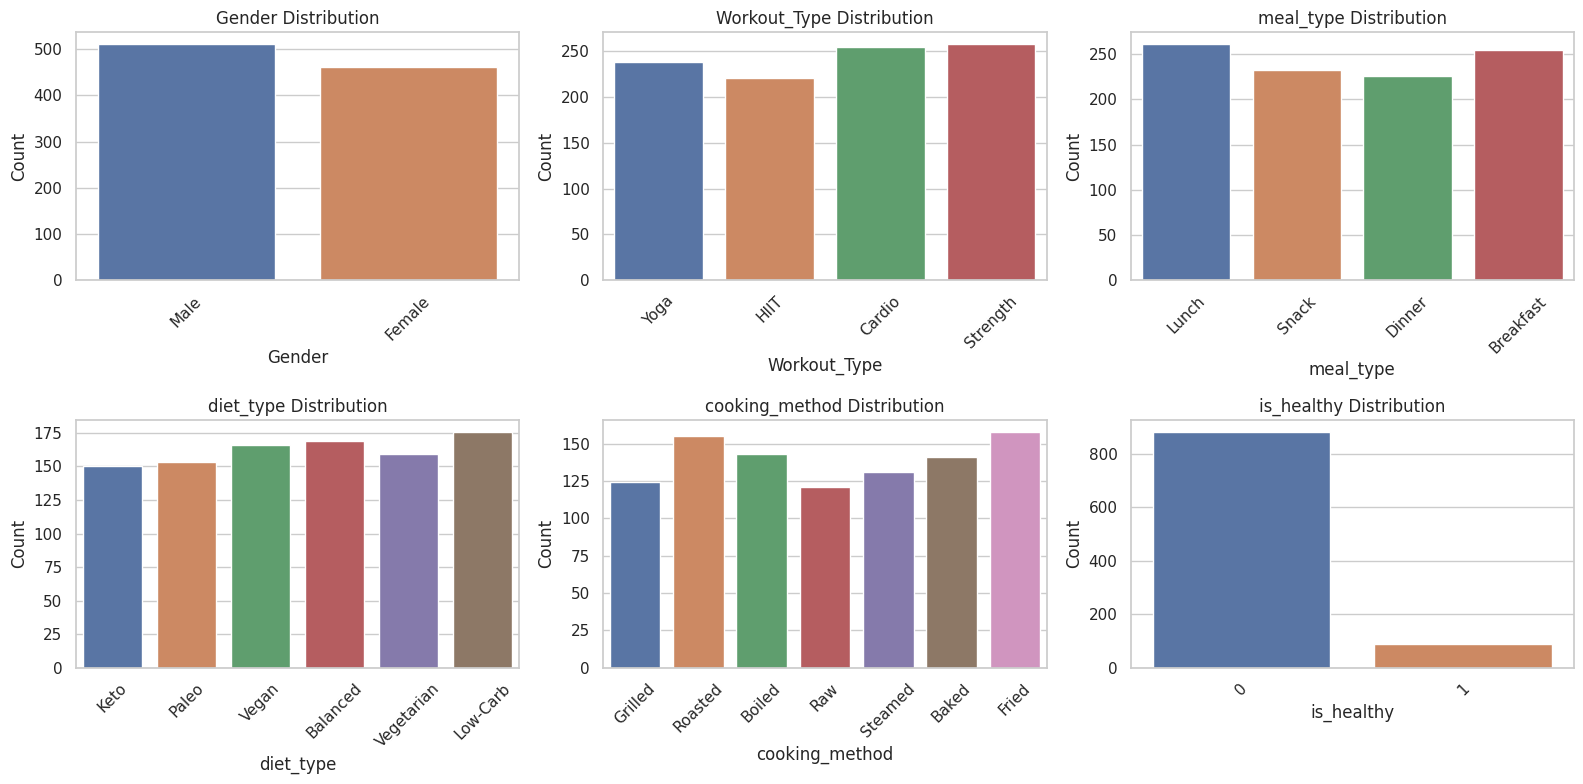

In [55]:
print("📊 CATEGORICAL BALANCE CHECK")

# Create a grid of subplots (adjust size depending on number of columns)
n_cols = 3  # number of plots per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # flatten to 1D array for easy indexing

# Loop through each categorical column
for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts(normalize=True) * 100
    max_share = counts.max()

    # Print summary in console
    print(f"\n{col}:")
    print(counts.round(2))
    if max_share > 70:
        print(f"⚠️ Imbalanced (one category = {max_share:.1f}% of data)")
    else:
        print("✅ Balanced")

    # Plot on subplot axis
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} Distribution", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## The summary we hav one column not balanced (is_healthy)

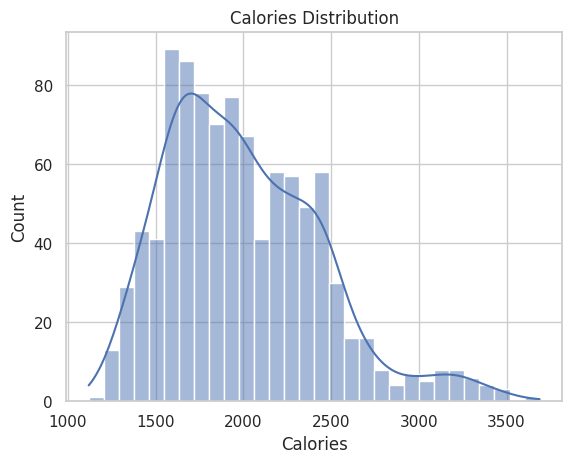

In [56]:
#check if data balanced or not
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title("Calories Distribution")
plt.show()

In [57]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}:")
        print(df[col].unique()[:10])  # show first few unique values
        print()


Gender:
['Male' 'Female']

Workout_Type:
['Yoga' 'HIIT' 'Cardio' 'Strength']

meal_name:
['Kid Pasta' 'Husband Rice' 'Activity Rice' 'Another Salad' 'Quite Stew'
 'Arm Stew' 'Item Rice' 'Thing Rice' 'Third Soup' 'Ask Pasta']

meal_type:
['Lunch' 'Snack' 'Dinner' 'Breakfast']

diet_type:
['Keto' 'Paleo' 'Vegan' 'Balanced' 'Vegetarian' 'Low-Carb']

cooking_method:
['Grilled' 'Roasted' 'Boiled' 'Raw' 'Steamed' 'Baked' 'Fried']



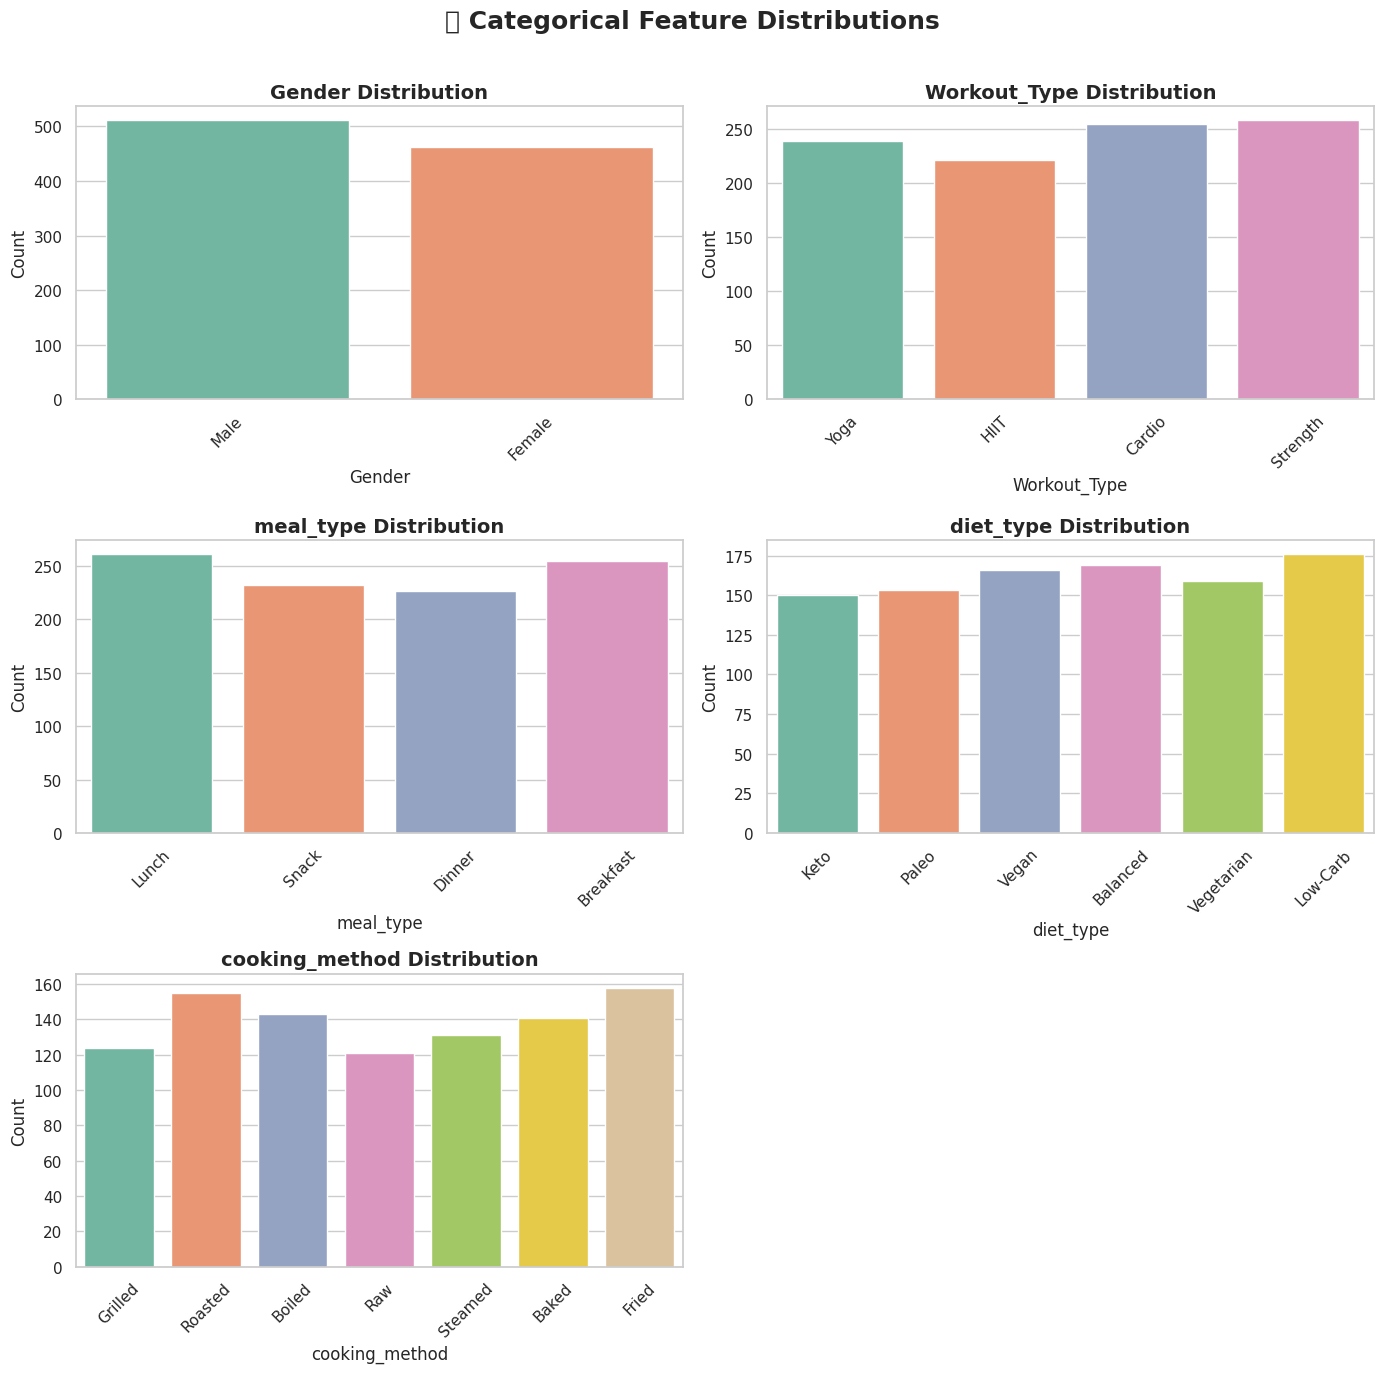

In [58]:
# List of categorical columns
categorical_cols = [
    'Gender',
    'Workout_Type',
    'meal_type',
    'diet_type',
    'cooking_method'
]

# Set style
sns.set(style="whitegrid", palette="Set2")

# Create subplots grid (3 rows × 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
axes = axes.flatten()

# Loop through each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col} Distribution", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title and adjust layout
fig.suptitle("📊 Categorical Feature Distributions", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Meal Name Analysis

In [59]:
#column meal_name has 908 unique values, that’s a very high cardinality feature
df['meal_name'].nunique()


908

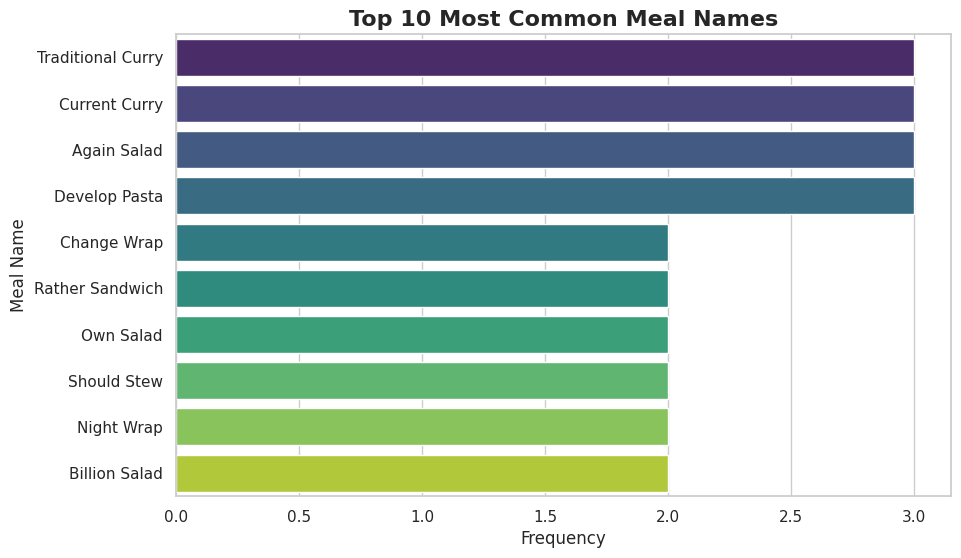

In [60]:
top_n = 10  # or 20 if you want more
top_meals = df['meal_name'].value_counts().head(top_n)

plt.figure(figsize=(10,6))
sns.barplot(x=top_meals.values, y=top_meals.index, palette='viridis')
plt.title(f"Top {top_n} Most Common Meal Names", fontsize=16, fontweight='bold')
plt.xlabel("Frequency")
plt.ylabel("Meal Name")
plt.show()


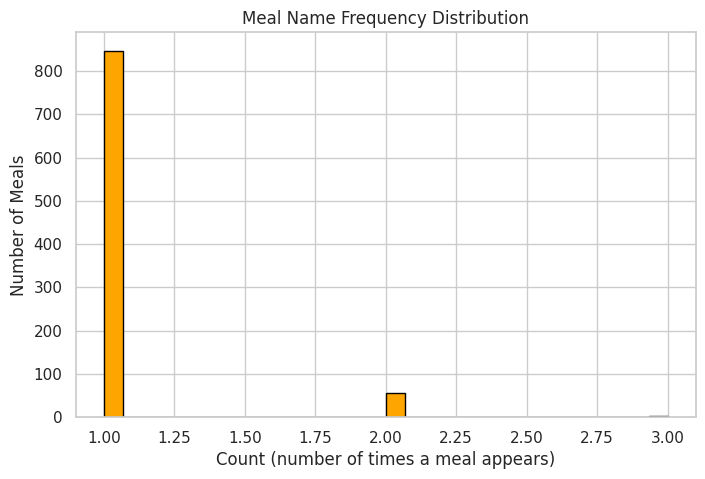

In [61]:
plt.figure(figsize=(8,5))
df['meal_name'].value_counts().plot(kind='hist', bins=30, color='orange', edgecolor='black')
plt.title("Meal Name Frequency Distribution")
plt.xlabel("Count (number of times a meal appears)")
plt.ylabel("Number of Meals")
plt.show()

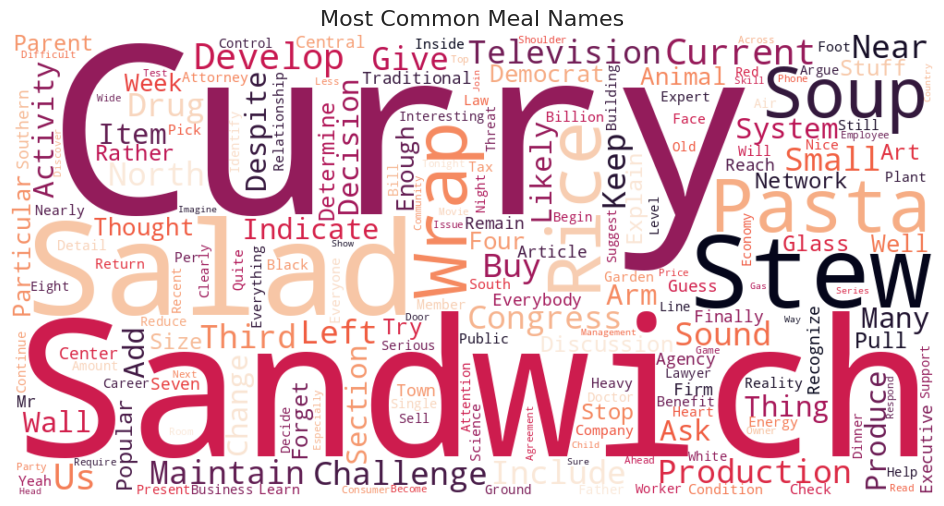

In [62]:
text = ' '.join(df['meal_name'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='rocket').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Meal Names", fontsize=16)
plt.show()


## check the numerical data balanced or not

In [63]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [64]:
skewness = df[numeric_cols].skew().sort_values(ascending=False)

for col, skew in skewness.items():
    status = "⚠️ Imbalanced" if abs(skew) > 1 else "✅ Balanced"
    print(f"{col:25s} | Skew = {skew:6.2f} | {status}")


is_healthy                | Skew =   2.84 | ⚠️ Imbalanced
Physical exercise         | Skew =   2.37 | ⚠️ Imbalanced
Proteins                  | Skew =   0.79 | ✅ Balanced
Carbs                     | Skew =   0.79 | ✅ Balanced
Calories                  | Skew =   0.79 | ✅ Balanced
Fats                      | Skew =   0.79 | ✅ Balanced
Weight (kg)               | Skew =   0.77 | ✅ Balanced
BMI                       | Skew =   0.76 | ✅ Balanced
Height (m)                | Skew =   0.34 | ✅ Balanced
Experience_Level          | Skew =   0.32 | ✅ Balanced
Calories_Burned           | Skew =   0.28 | ✅ Balanced
Workout_Frequency (days/week) | Skew =   0.15 | ✅ Balanced
Daily meals frequency     | Skew =   0.13 | ✅ Balanced
Avg_BPM                   | Skew =   0.09 | ✅ Balanced
Water_Intake (liters)     | Skew =   0.07 | ✅ Balanced
cook_time_min             | Skew =   0.06 | ✅ Balanced
sugar_g                   | Skew =   0.03 | ✅ Balanced
Session_Duration (hours)  | Skew =   0.03 | ✅ Balanced


## we will solve the data unbalanced when we finished collecting data

In [65]:
#best exercise 
df4=pd.read_csv('/kaggle/input/best-50-exercise-for-your-body/Top 50 Excerice for your body.csv')

#also data talked about exercise 
df5=pd.read_csv('/kaggle/input/the-ultimate-gym-exercises-dataset-for-all-levels/Workout.csv')

df4.shape

(50, 8)

In [66]:
df5.shape

(52, 5)

In [67]:
#show columns name 
df4.columns

Index(['Name of Exercise', 'Sets', 'Reps', 'Benefit',
       'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level'],
      dtype='object')

In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name of Exercise             50 non-null     object
 1   Sets                         50 non-null     int64 
 2   Reps                         50 non-null     int64 
 3   Benefit                      50 non-null     object
 4   Burns Calories (per 30 min)  50 non-null     int64 
 5   Target Muscle Group          50 non-null     object
 6   Equipment Needed             30 non-null     object
 7   Difficulty Level             50 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.3+ KB


## we will marge all features in data 4 about best exercise

In [69]:
#concatination
df = pd.concat([df, df4], axis=1)
df.shape

(973, 41)

In [70]:
df5.columns

Index(['Body Part', 'Type of Muscle', 'Workout', 'Sets', 'Reps per Set'], dtype='object')

## Data Handling And Preprocessing

In [71]:
# Drop Unneeded Columns
df5.drop(columns=['Sets','Reps per Set'],inplace=True)
df5.columns

Index(['Body Part', 'Type of Muscle', 'Workout'], dtype='object')

In [72]:
#concatenation Data 5 with Needed Data
df=pd.concat([df, df5], axis=1)
df.shape

(973, 44)

In [73]:
#show missing value in data
print(f"Missing Value = {df.isnull().sum()}")

#show duplicated value
print(f'Duplicated = {df.duplicated().sum()}')


Missing Value = Age                                0
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                       0
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                                0
Daily meals frequency              0
Physical exercise                  0
Carbs                              0
Proteins                           0
Fats                               0
Calories                           0
meal_name                          0
meal_type                          0
diet_type                          0
sugar_g                            0
sodium_mg                          0
cholesterol_mg        

In [74]:
#check again after remove Null Value 
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
Age,0.00
Gender,0.00
Weight (kg),0.00
Height (m),0.00
Max_BPM,0.00
Avg_BPM,0.00
Resting_BPM,0.00
Session_Duration (hours),0.00
Calories_Burned,0.00
Workout_Type,0.00


In [75]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,Sets,Reps,Benefit,Burns Calories (per 30 min),Target Muscle Group,Equipment Needed,Difficulty Level,Body Part,Type of Muscle,Workout
0,56.0,Male,88.3,1.71,180.0,157.0,60.0,1.69,1313.0,Yoga,...,3.0,15.0,Builds upper body strength,200.0,"Chest, Triceps, Shoulders",NaN,Intermediate,Chest,Upper Chest,Incline dumbbell press
1,46.0,Female,74.9,1.53,179.0,151.0,66.0,1.30,883.0,HIIT,...,4.0,12.0,Strengthens lower body,223.0,"Quadriceps, Hamstrings, Glutes",NaN,Beginner,Chest,Upper Chest,Incline cable crossovers
2,32.0,Female,68.1,1.66,167.0,122.0,54.0,1.11,677.0,Cardio,...,3.0,10.0,Improves balance and coordination,275.0,"Quadriceps, Hamstrings, Glutes",NaN,Beginner,Chest,Upper Chest,Incline dumbbell flyes
3,25.0,Male,53.2,1.70,190.0,164.0,56.0,0.59,532.0,Strength,...,3.0,10.0,Full body workout,355.0,Full Body,NaN,Advanced,Chest,Lower Chest,Decline dumbbell press
4,38.0,Male,46.1,1.79,188.0,158.0,68.0,0.64,556.0,Strength,...,3.0,20.0,Improves cardiovascular fitness,240.0,"Core, Shoulders, Legs",NaN,Intermediate,Chest,Lower Chest,Decline cable crossovers


## Fill missing values


In [76]:
df['Equipment Needed'].isnull()

0      True
1      True
2      True
3      True
4      True
       ... 
968    True
969    True
970    True
971    True
972    True
Name: Equipment Needed, Length: 973, dtype: bool

In [77]:
equipment_list = [
    "Dumbbells", "Barbell", "Resistance Bands", "Kettlebell", "Pull-up Bar",
    "Medicine Ball", "Bench", "Cable Machine", "Treadmill", "No Equipment"
]

df['Equipment Needed'] = df['Equipment Needed'].fillna(np.random.choice(equipment_list))


In [78]:
df['Equipment Needed'].isnull().sum()

0

In [79]:
# Define realistic value lists

benefit_list = [
    "Builds upper body strength", "Improves flexibility", "Enhances endurance",
    "Burns fat quickly", "Increases muscle mass", "Improves posture",
    "Boosts cardiovascular fitness", "Improves balance and coordination"
]

target_muscle_list = [
    "Chest", "Back", "Arms", "Legs", "Core", "Shoulders",
    "Glutes", "Full Body", "Quadriceps", "Triceps"
]

difficulty_list = ["Beginner", "Intermediate", "Advanced"]

body_part_list = [
    "Chest", "Back", "Legs", "Arms", "Shoulders", "Core", "Full Body"
]

type_of_muscle_list = [
    "Upper Chest", "Lower Chest", "Biceps", "Triceps",
    "Quads", "Hamstrings", "Abs", "Deltoids", "Lats"
]

workout_list = [
    "Bench Press", "Push Ups", "Pull Ups", "Squats", "Deadlift", 
    "Lunges", "Plank", "Bicep Curls", "Overhead Press", "Lat Pulldown"
]


In [80]:
df['Benefit'] = df['Benefit'].fillna(np.random.choice(benefit_list))
df['Target Muscle Group'] = df['Target Muscle Group'].fillna(np.random.choice(target_muscle_list))
df['Difficulty Level'] = df['Difficulty Level'].fillna(np.random.choice(difficulty_list))
df['Body Part'] = df['Body Part'].fillna(np.random.choice(body_part_list))
df['Type of Muscle'] = df['Type of Muscle'].fillna(np.random.choice(type_of_muscle_list))
df['Workout'] = df['Workout'].fillna(np.random.choice(workout_list))


In [81]:
df.loc[df['Body Part'] == 'Chest', 'Type of Muscle'] = np.random.choice(["Upper Chest", "Lower Chest"])
df.loc[df['Body Part'] == 'Legs', 'Type of Muscle'] = np.random.choice(["Quads", "Hamstrings"])
df.loc[df['Body Part'] == 'Arms', 'Type of Muscle'] = np.random.choice(["Biceps", "Triceps"])
df.loc[df['Body Part'] == 'Back', 'Type of Muscle'] = np.random.choice(["Lats", "Deltoids"])
df.loc[df['Body Part'] == 'Core', 'Type of Muscle'] = "Abs"

In [82]:
# Verify result

print("✅ Missing values after filling:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\n✅ Sample of cleaned dataset:")
print(df[['Workout', 'Body Part', 'Type of Muscle', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level']].head(10))

✅ Missing values after filling:
Name of Exercise               923
Burns Calories (per 30 min)    923
Reps                           923
Sets                           923
rating                           0
sugar_g                          0
sodium_mg                        0
cholesterol_mg                   0
serving_size_g                   0
cooking_method                   0
dtype: int64

✅ Sample of cleaned dataset:
                    Workout Body Part Type of Muscle  \
0    Incline dumbbell press     Chest    Lower Chest   
1  Incline cable crossovers     Chest    Lower Chest   
2    Incline dumbbell flyes     Chest    Lower Chest   
3    Decline dumbbell press     Chest    Lower Chest   
4  Decline cable crossovers     Chest    Lower Chest   
5    Decline dumbbell flyes     Chest    Lower Chest   
6               Chest flyes     Chest    Lower Chest   
7          Cable crossovers     Chest    Lower Chest   
8            Dumbbell flyes     Chest    Lower Chest   
9              

In [83]:
import random

exercise_names = [
    "Push Ups", "Squats", "Lunges", "Plank", "Deadlift", 
    "Bicep Curls", "Bench Press", "Burpees", "Mountain Climbers", "Leg Press"
]

target_muscles = [
    "Chest", "Legs", "Back", "Core", "Arms", 
    "Shoulders", "Glutes", "Full Body"
]

equipments = [
    "Dumbbells", "Barbell", "Resistance Band", "Bodyweight", 
    "Kettlebell", "Machine", "Bench", "Cable"
]

difficulty_levels = ["Beginner", "Intermediate", "Advanced"]

# 1️⃣ Name of Exercise
df['Name of Exercise'] = df['Name of Exercise'].fillna(
    pd.Series(np.random.choice(exercise_names, size=len(df)), index=df.index)
)

# 2️⃣ Reps and Sets 
def generate_reps(difficulty):
    if difficulty == 'Beginner':
        return random.randint(10, 15)
    elif difficulty == 'Intermediate':
        return random.randint(12, 20)
    else:
        return random.randint(15, 25)

def generate_sets(difficulty):
    if difficulty == 'Beginner':
        return random.randint(2, 3)
    elif difficulty == 'Intermediate':
        return random.randint(3, 4)
    else:
        return random.randint(4, 5)

df['Reps'] = df['Reps'].fillna(df['Difficulty Level'].apply(generate_reps))
df['Sets'] = df['Sets'].fillna(df['Difficulty Level'].apply(generate_sets))

#  Burns Calories (per 30 min)
def generate_calories(row):
    base = {'Beginner': 150, 'Intermediate': 250, 'Advanced': 350}
    wt_factor = 0.2 * (row['Weight (kg)'] - 70) if 'Weight (kg)' in df.columns else 0
    return base.get(row['Difficulty Level'], 200) + wt_factor + random.randint(-20, 20)

df['Burns Calories (per 30 min)'] = df['Burns Calories (per 30 min)'].fillna(df.apply(generate_calories, axis=1))

#  Target Muscle Group
df['Target Muscle Group'] = df['Target Muscle Group'].fillna(
    pd.Series(np.random.choice(target_muscles, size=len(df)), index=df.index)
)

#  Equipment Needed
df['Equipment Needed'] = df['Equipment Needed'].fillna(
    pd.Series(np.random.choice(equipments, size=len(df)), index=df.index)
)

#  Difficulty Level
df['Difficulty Level'] = df['Difficulty Level'].fillna(
    pd.Series(np.random.choice(difficulty_levels, size=len(df)), index=df.index)
)

missing_after = df.isna().sum()
print("✅ Missing values after filling:\n", missing_after[missing_after > 0])


✅ Missing values after filling:
 Series([], dtype: int64)


In [84]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Daily meals frequency            0
Physical exercise                0
Carbs                            0
Proteins                         0
Fats                             0
Calories                         0
meal_name                        0
meal_type                        0
diet_type                        0
sugar_g                          0
sodium_mg                        0
cholesterol_mg                   0
serving_size_g                   0
cooking_method      

In [85]:
import random

target_rows = 20000
current_rows = df.shape[0]
rows_to_add = target_rows - current_rows

print(f"📊 Current shape: {df.shape}")

df_large = pd.concat([df] * (rows_to_add // current_rows + 1), ignore_index=True)
df_large = df_large.sample(n=target_rows, replace=True, random_state=42).reset_index(drop=True)

numeric_cols = df_large.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    noise = np.random.normal(0, df_large[col].std() * 0.02, len(df_large))
    df_large[col] = np.round(df_large[col] + noise, 2)

categorical_cols = df_large.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_vals = df[col].dropna().unique()
    df_large[col] = np.random.choice(unique_vals, size=len(df_large), replace=True)

df_large['BMI'] = np.round(df_large['Weight (kg)'] / (df_large['Height (m)'] ** 2), 2)

def calc_calories(row):
    level_factor = 1 + (row['Experience_Level'] / 10)
    duration = row['Session_Duration (hours)']
    workout = row['Workout_Type']
    base = {
        'HIIT': 11,
        'Strength': 9,
        'Cardio': 8,
        'Yoga': 6
    }.get(workout, 8)
    return np.round(base * 100 * duration * level_factor, 2)

df_large['Calories_Burned'] = df_large.apply(calc_calories, axis=1)

df_large['Fat_Percentage'] = np.clip(
    25 + (df_large['BMI'] - 22) * 0.8 - df_large['Experience_Level'] * 0.5 +
    np.random.normal(0, 2, len(df_large)), 8, 35
)

#  Calories intake
df_large['Calories'] = np.round(
    (df_large['Weight (kg)'] * 25) +
    (df_large['Workout_Frequency (days/week)'] * 50) +
    (df_large['Physical exercise'] * 20) +
    np.random.normal(0, 100, len(df_large))
)

df_large['Age'] = np.clip(df_large['Age'], 18, 70)
df_large['Water_Intake (liters)'] = np.clip(df_large['Water_Intake (liters)'], 1, 5)
df_large['Experience_Level'] = np.clip(df_large['Experience_Level'], 1, 5)
df_large['Session_Duration (hours)'] = np.clip(df_large['Session_Duration (hours)'], 0.3, 2.5)

print(f"✅ Final realistic shape: {df_large.shape}")
print(df_large.head(5))


📊 Current shape: (973, 44)
✅ Final realistic shape: (20000, 44)
     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  35.11  Female        66.26        1.62   188.95   158.10        68.97   
1  22.74    Male        56.90        1.55   178.51   131.88        73.03   
2  33.01  Female        59.57        1.67   175.16   123.73        54.92   
3  38.92    Male        93.38        1.70   190.96   155.03        49.90   
4  44.63    Male        51.86        1.88   193.69   152.88        71.02   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  Sets   Reps  \
0                      1.00          1080.90     Strength  ...  4.01  15.06   
1                      1.40          1515.78     Strength  ...  3.01  13.06   
2                      0.90          1088.01         HIIT  ...  3.00  15.03   
3                      1.09          1044.66       Cardio  ...  3.99  12.97   
4                      1.08          1035.94       Cardio  ...  4.01  15.95   

    

In [86]:
# ✅ Save the enlarged dataset to CSV
df_large.to_csv("expanded_fitness_data.csv", index=False)

print("✅ File saved successfully as 'expanded_fitness_data.csv'")
print("📊 Final shape:", df_large.shape)


✅ File saved successfully as 'expanded_fitness_data.csv'
📊 Final shape: (20000, 44)
